# Exercise 3

Work on this before the next lecture on 1 May. We will talk about questions, comments, and solutions during the exercise after the third lecture.

Please do form study groups! When you do, make sure you can explain everything in your own words, do not simply copy&paste from others.

The solutions to a lot of these problems can probably be found with Google. Please don't. You will not learn a lot by copy&pasting from the internet.

If you want to get credit/examination on this course please upload your work to **your GitHub repository** for this course **before** the next lecture starts and post a link to your repository [in this thread](). If you worked on things together with others please add their names to the notebook so we can see who formed groups.

---

These are some useful default imports for plotting and [`numpy`](http://www.numpy.org/)

In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

---

## Question 1

Finding analytic gradients of expressions. Use the backprop framework we built in the lecture to compute the analytic gradient of an expression. This is useful to get thinking about
writing computations as graphs and to see first hand that there is no magic involved
in automatically finding derivatives.

For example, using the expression: $f(x) = \sin(x^2)$: implement a module for $\sin(x)$, build the graph representing the function, plot the expression as well as the gradient as a function of $x$.

* add a new operation (e.g. $\sin, \cos, \exp, x^y$, ...) to the `Addition` and `Multiply` modules.
* build a new expression using the available expressions
* plot your expression as well as its gradient
* compare the gradient to one you worked out by hand (or some other software package)

ps. if you want to use automatic differentiation for serious projects outside of neural
network projects checkout packages like https://github.com/HIPS/autograd

In [ ]:
class Multiply:
    def forward(self, x, y):
        self.x = x
        self.y = y
        return x * y
    
    def backward(self, dLdz):
        dzdx = self.y
        dLdx = dLdz * dzdx
        
        dzdy = self.x
        dLdy = dLdz * dzdy
        return [dLdx, dLdy]


class Add:
    def forward(self, x, y):
        self.x = x
        self.y = y
        return x + y
        
    def backward(self, dLdz):
        dzdy = 1
        dzdx = 1
        return [dLdz * dzdy, dLdz * dzdx]

In [ ]:
def f_with_gradients(x, y, z):
    q = Add()
    f = Multiply()
    
    q_out = q.forward(x, y)
    f_out = f.forward(q_out, z)
    
    grad_f = f.backward(1.)
    grad_q = q.backward(grad_f[0])

    gradients = [grad_q[0], grad_q[1], grad_f[1]]
    return f_out, gradients

In [ ]:
# your solution here

---

## Question 2

Use the circle data set from exercise 1 and build a neural network classifier that can solve the problem (scikit-learn provides a MLPClassifier classifier that implements a neural network). Comment on:

* what is the minimum number of layers
* what is the minimum width of each layer
* does the answer change if you provide polynomial features?
* thinking about how NNs distort and transform the problem space, can you create
  a visualisation of what it is the network is doing to make this problem linearly
  separable?
* is there a difference between using the tanh and ReLU activation functions?

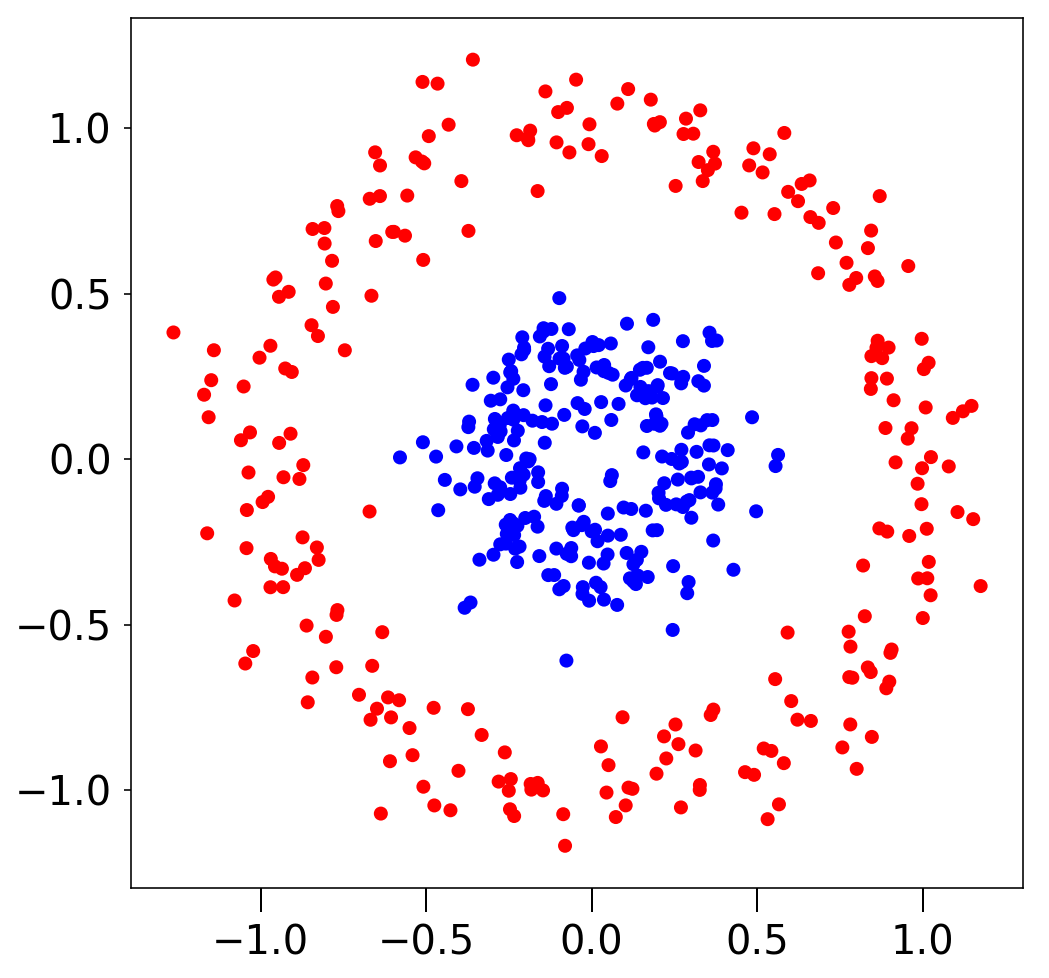

In [3]:
# Circle dataset from Question 4, Exercise 1

from sklearn.datasets import make_circles

X, y = make_circles(n_samples=500, factor=.3, noise=.1)
labels = ['b', 'r']
y = np.take(labels, (y < 0.5))

plt.scatter(X[:,0], X[:,1], c=y)

## The answers by reasoning

A NN is able to combine only linearly the inputs of the units, adjusting the weight that each unit gives to them. 

In principle, since we are dealing with a classification task with 2 features, we may argue that the **minimum number of units** is 4 (in the case of 1 layer). Very naively, we can justify this number by saying that, in the simplest setting, 2 units should be able to separate blue points from red along e.g. the vertical axis (somehow 'activating' the NN such that when a point falls between -0.5 and 0.5 is assigned to the blue class), while the other 2 units should act in order to discriminate points along the horizontal axis. Thus, the resulting bounds between blue and red points should be similar to the sides of a square.

Moreover, we can argue that the **minimum number of inner layers** should be 2 (in the case of a ), since with a single layer each neuron only perform summation from the inputs in that inner layer. In we have more than 1 inner layer, we can then start to tweak the output recevied by the first inner layer and pass it to the units of a second layer. This operation may allow to take some combination of the outputs of the first layer that are able to perform the task. However, we are still limited about the fact that only linear combinations of the input (or ouputs) can be taken. Thus we cannot take advantage of other operations that involve the combination of the inputs in other ways (like in a product).

If we use **polynomial features**, the classification may be easier since points are generated by using $r^{2} = (x_{1} + x_{2})^{2}$ as a function, i.e. the features are combined non-linearly to generate them. With polynomial features, we can thus achieve exactly such combinations as input.

## The answers in practice

In [2]:
# From "Neural networks in scikit-learn" part of the lecture.

from sklearn.neural_network import MLPClassifier
from utils import plot_surface
from ipywidgets import interact


# Instantiate the classifier

mlpc = MLPClassifier(hidden_layer_sizes=(1,), 
                    max_iter=3000,
                    verbose=0, 
                    random_state=1,
                    activation='relu')

### Visualizing how the NN is tranforming the problem space

In [119]:
# The functions below have been adpated from the lecture and lecture n. 2.

# Here, I chose to have the same number of neurons in each layer.

def run_varying_n_layers_n_neurons(n_neurons = 1, n_layers = 1, solver='adam', activation='relu' ):
    mlpc.set_params( hidden_layer_sizes=(n_neurons,)*n_layers, 
                     activation=activation,
                     solver=solver
                   )
    mlpc.fit(X, y) # fit the NN with parameters specified in mlpc.set_params()
    plot_surface(mlpc,X,y)

interact(run_varying_n_layers_n_neurons, n_neurons = (1, 10, 1), n_layers = (1, 10, 1), activation = ['tanh', 'identity', 'relu'], solver=['lbfgs','adam']);

### Minimum number of layers

If we stick to 1 neuron per layer but increase the number of layers the classification task cannot be performed, no matter the number of layers, since we are simply transforming the input layer using activation functions of the next layers in cascade. Hence, we cannot do better than finding a line that separate in the best possible way the dataset.

Increasing the number of layers (each with 2 neurons) it seems not to improve the situation, i.e. any number of layers with 2 neurons each cannot discriminate blue and red points more than drawing a straight line that try to do its best to separate them.

The same is true for 3 neurons, in the sense that bounds that separate blue and red points start to define better regions where points are less mixed, but the situation seems to worsten if we increase the number of layers, i.e. regions of different intensity of color gets become more homogeneous (i.e. for the number of layers = 5 the background is uniformly redish).

With 4 neurons in each layer, for 1 layer the performance is similar to the one for 3 neurons. However, increasing the number of layers improves the classification, namely the bounds around blue points gets less fuzzy. On the other hand, is worth to note that with 5 layers we start to see the dark blue region is augmented by a diagonal band that also cross some red points.

### Minimum number of units/neurons

5 neurons and 1 layer are enough to reproduce visually the separation between red and blue points, at least qualitatively. Increasing the number of neurons up to 7 does not seem to improve the classification boundaries. However, using 8 neurons improves the classification but, after this value, increasing the number of neurons do not qualitatively improve the classification.

In general, we can thus say that is better to increase the number of neurons wrt to increasing the number of layers, since the latter operation seems to improve the classification less than the former one.

---

The conclusions drawn from the visualization are somehow confirmed by the plots below, even if I still have to understand why the loss function is increasing instead of decreasing as the number of layers grows.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=66)

n_neurons 1
n_neurons 2
n_neurons 3
n_neurons 4


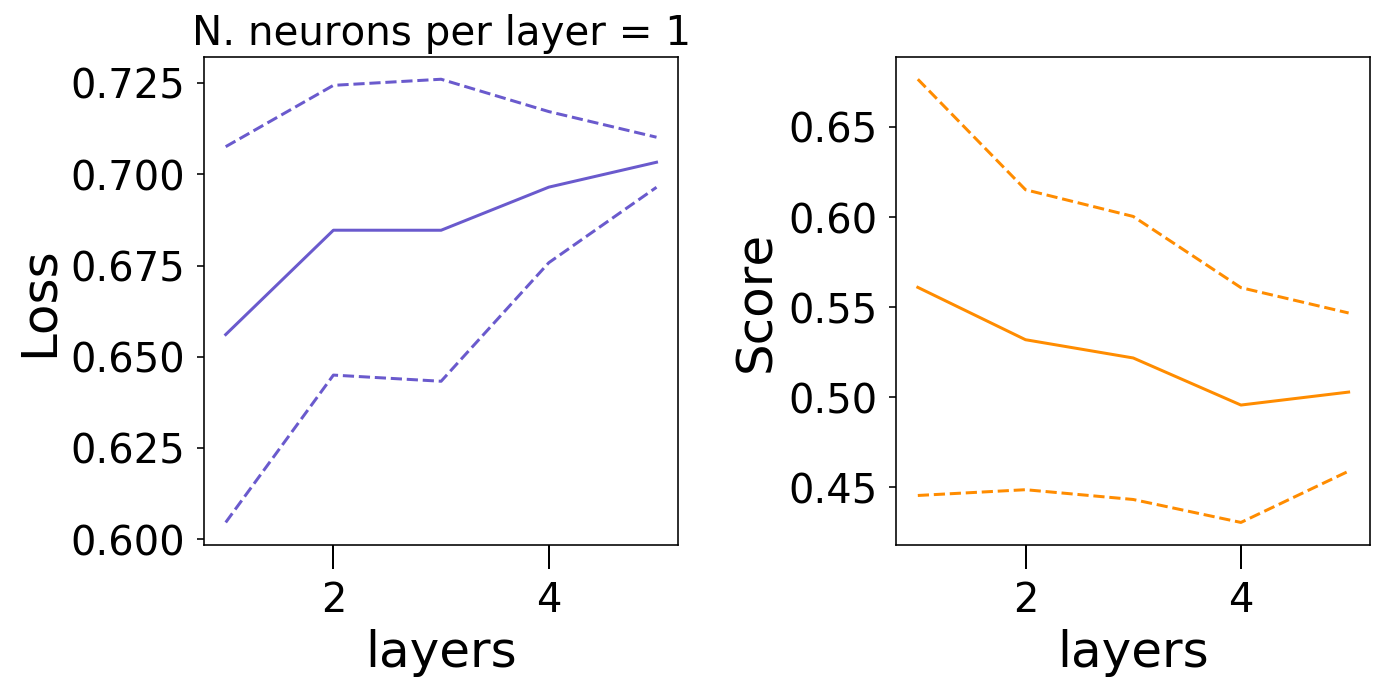

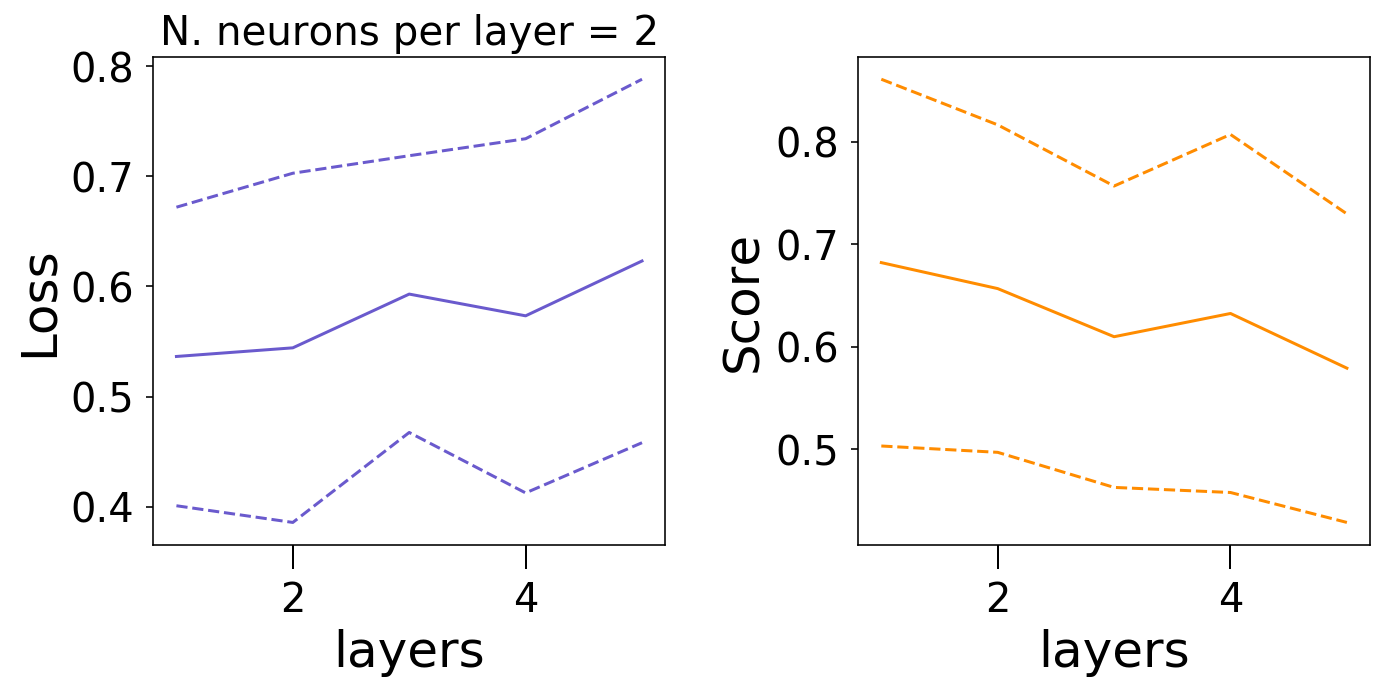

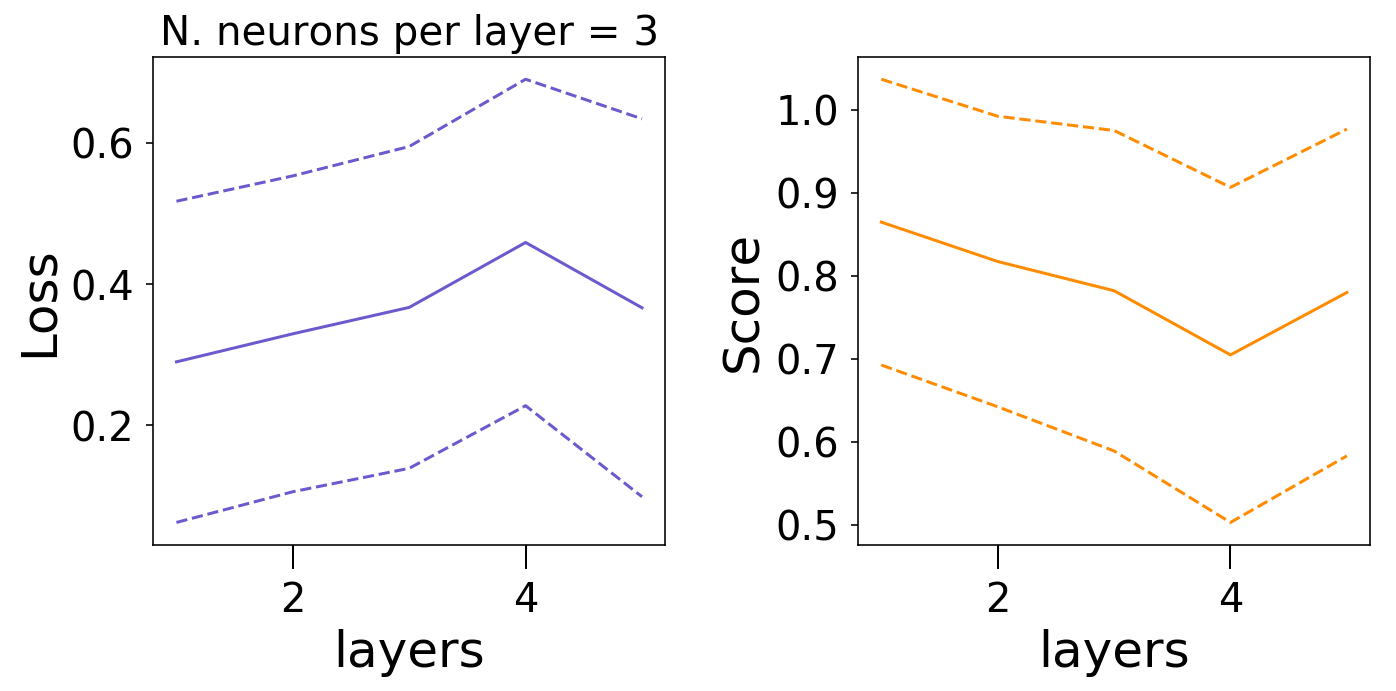

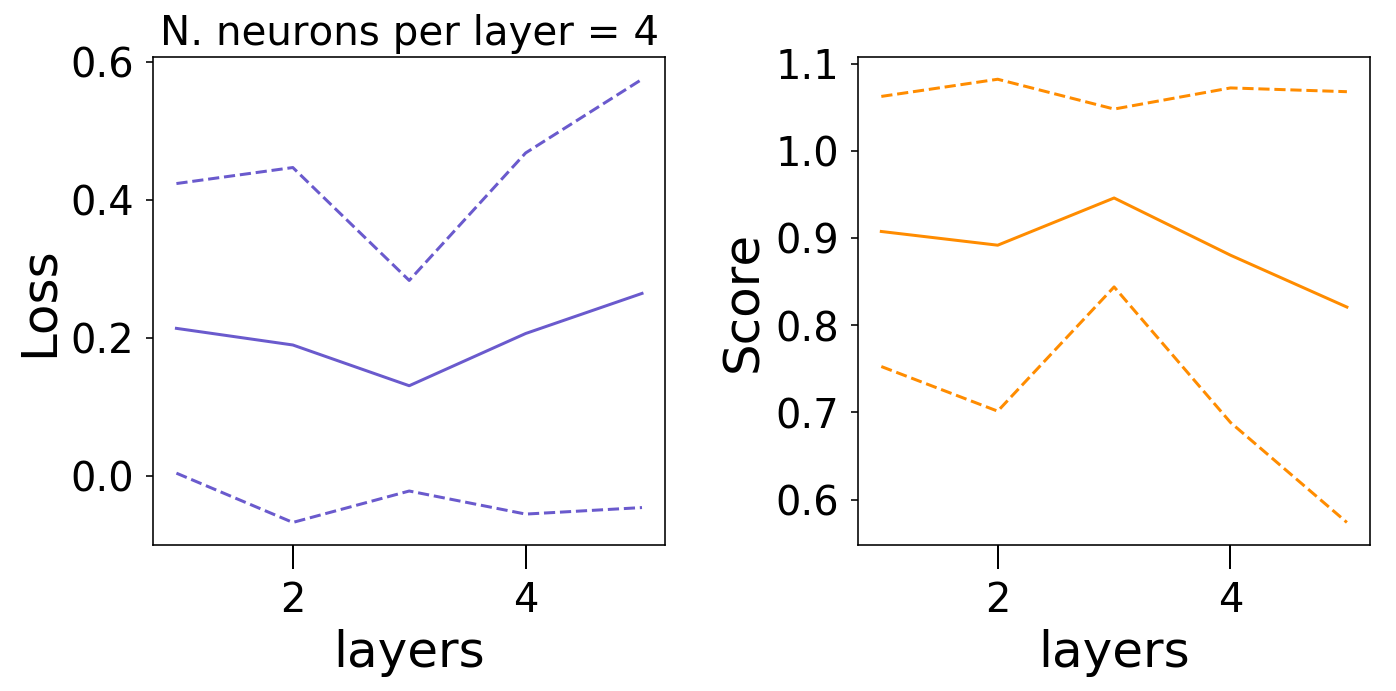

In [8]:
neurons_range = range(1,5)
layers_range = range(1,6)

# It takes 5 minutes to run with n_runs = 30

n_runs = 30

for n_neurons in neurons_range:
    print("n_neurons", n_neurons)
    fig, ax = plt.subplots(1,2, figsize=(10,5))
    avg_loss_n_neurons = []
    std_loss_n_neurons = []
    avg_score_test_n_neurons = []
    std_score_test_n_neurons = []
    for n_layers in layers_range:
        losses = []
        scores_test = []
        for j in range(n_runs):
            mlpc.set_params(hidden_layer_sizes=(n_neurons,)*n_layers, random_state = None)
            mlpc.fit(X_train,y_train)
            losses.append(mlpc.loss_)
            scores_test.append(mlpc.score(X_test,y_test))
        avg_loss_n_neurons.append(np.mean(losses))
        std_loss_n_neurons.append(np.std(losses))
        avg_score_test_n_neurons.append(np.mean(scores_test))
        std_score_test_n_neurons.append(np.std(scores_test))
    avg_loss_n_neurons = np.array(avg_loss_n_neurons)
    std_loss_n_neurons = np.array(std_loss_n_neurons)
    avg_score_test_n_neurons = np.array(avg_score_test_n_neurons)
    std_score_test_n_neurons = np.array(std_score_test_n_neurons)
    #
    ax[0].plot(layers_range, avg_loss_n_neurons, color='slateblue')
    ax[0].plot(layers_range, avg_loss_n_neurons - std_loss_n_neurons, layers_range, avg_loss_n_neurons + std_loss_n_neurons, ls = '--', color='slateblue')
    ax[0].set_title("N. neurons per layer = {0}".format(n_neurons))
    ax[0].set_xlabel("layers")
    ax[0].set_ylabel("Loss")
    ax[0].set_xticks(layers_range)
    #
    ax[1].plot(layers_range, avg_score_test_n_neurons, color='darkorange')
    ax[1].plot(layers_range, avg_score_test_n_neurons - std_score_test_n_neurons, layers_range, avg_score_test_n_neurons + std_score_test_n_neurons, ls = '--', color='darkorange')
    ax[1].set_xlabel("layers")
    ax[1].set_ylabel("Score")
    ax[1].set_xticks(layers_range)
    #
    plt.tight_layout()

### About the solver

The documentation of MLPClassifier(), it states that the solver 'lbfgs' works pretty well in the case of a small dataset (which I suppose is our case). On the other hand, 'adam' (the default solver) is best suited for large datasets. 

For the present dataset, using 'lbfgs' with 4 neurons (and 1 layer) are enough to draw good bounds between blue and red points, with well separated blue and red dark regions. Even if increasing the number of layers seems not to define better buounds (i.e., if the double the number of neurons in the single layer the shape does not seem mot circle-like.). 
Indeed, the bounds look more like a polygon with roughly 4 sides almost perpendicular and others parallel to some of them. On the other hand, probability regions defined by different intensities of the background colors are less fuzzy than in the case of 'adam', i.e. the transition between dark blue and red is much sharper. 

Thus, we can say that, in general, 'lbfgs' seems to learn rules that better discrimate between points, i.e. where misclassification probabilities (encoded by lighter colors) are diffused over narrower regions as compared to the 'adam' case.

#### About the activation function

If the activation function is linear, i.e. the identity, no matter the number of layers and neurons for each of them we choose, the NN is not able to separate the red and blue points.
This is due to the fact that one cannot perform such task by simply selecting linear combinations of linear activation functions, since the dataset was separate using a nonlinear function.

---

### Introducing polynomial features

In principle, the polynomial features of degree 2 should be able to perform the classification. Indeed, input features are transformed by a non linear function (polynomial of degree 2) which couples the original features. Then, the NN may "learn" how to classify points by silencing the weights associated to the linear units and weighting more the non-linear units that expresses $x_{1}^2, x_{2}^2$ and $x_{1}x_{2}$.

Comment: if we fit directly MPLClassifier, providing X and y, in the attributes ".coefs" are stored the weights of the different units with the layers, while in the ".intercepts" are stored the bias. Once we combine the inputs using PolynomialFeatures, the default behavior is to provide also the order 0 of the combination of inputs, i.e. the polynomial input has value 1 always. However, it seems to me that the same type of information is already handled by the NN using the bias. Hence, to give as input polynomial features that are not already extracted by the NN itself, I decided to not include the 0 order polynomial in the transformed features. In this way, we may avoid some redundancy and we use transformed features that are more similar to the format X that we gave as inputs before.

In [116]:
from sklearn.preprocessing import PolynomialFeatures

polyft = PolynomialFeatures(2, include_bias=False)

X_polyft = polyft.fit_transform(X)

# Transform the same training and test set above

X_train_polyft = polyft.fit_transform(X_train)
X_test_polyft = polyft.fit_transform(X_test)

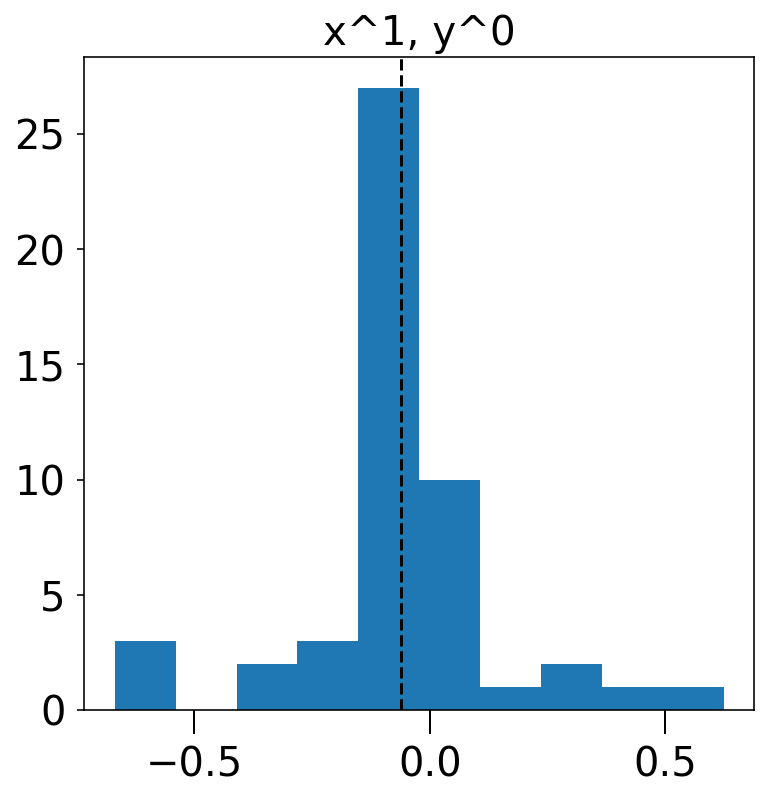

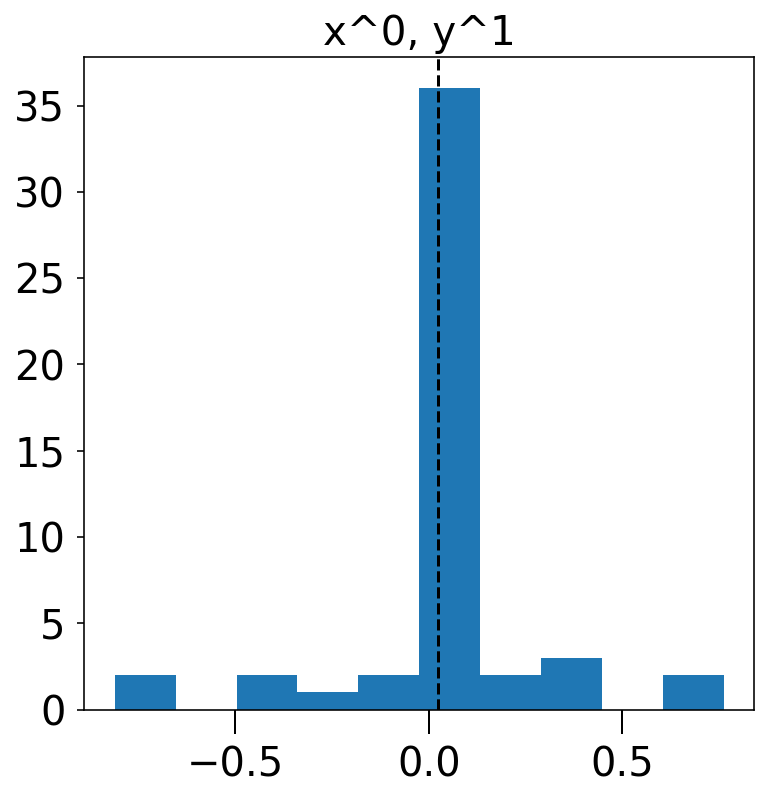

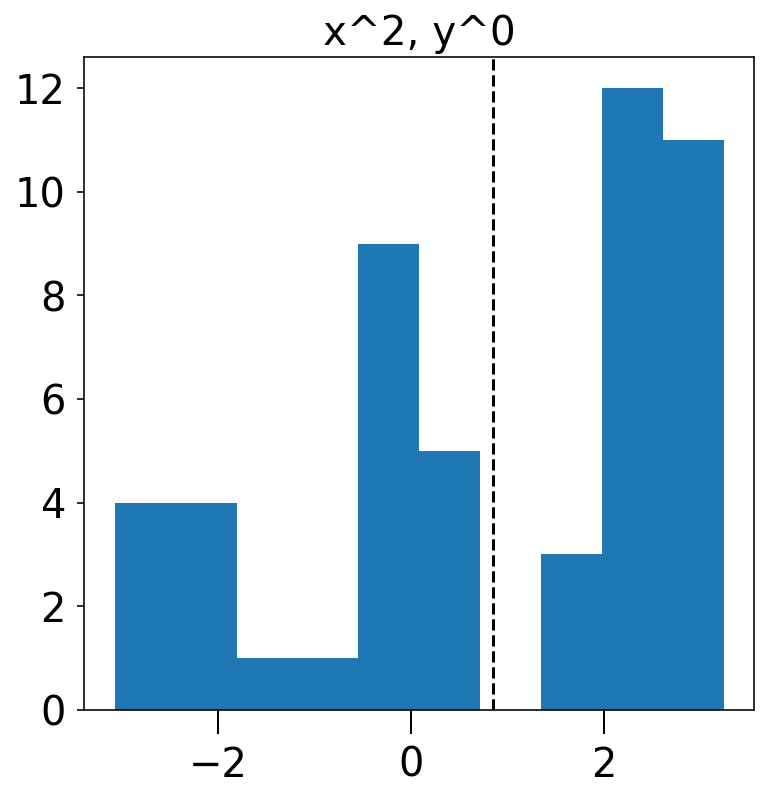

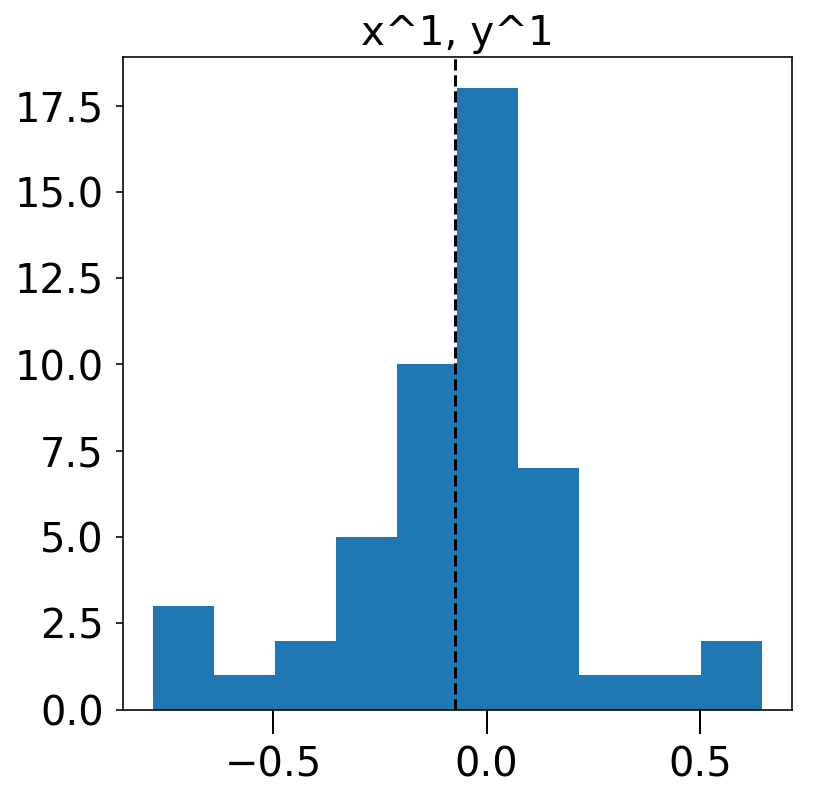

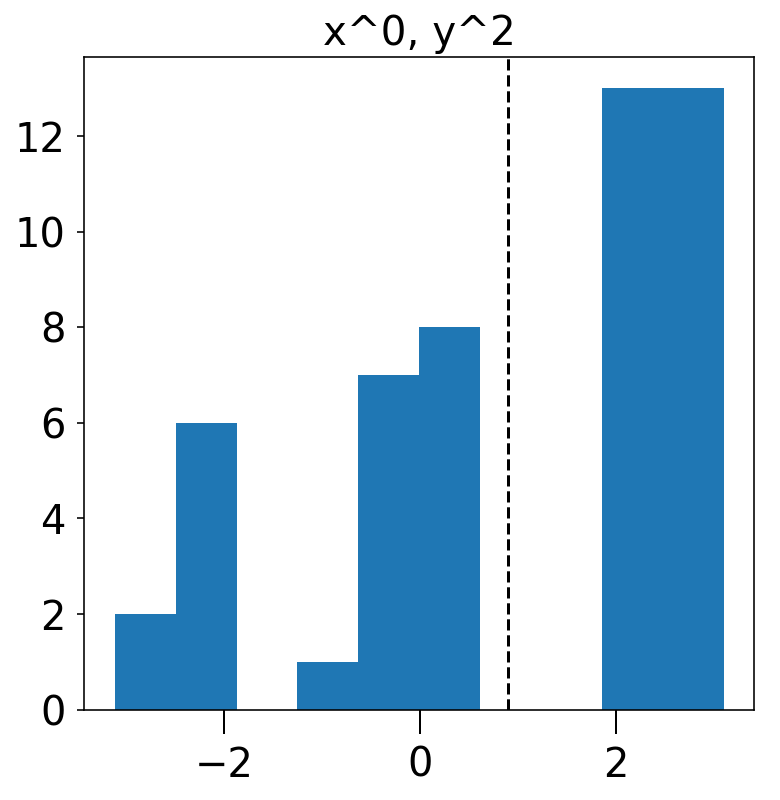

In [111]:
mlpcr = MLPClassifier(hidden_layer_sizes=(1,), 
                    max_iter=3000,
                    verbose=0,
                    activation='relu')

n_runs = 50

array_weights = np.zeros((n_runs, polyft.n_output_features_))
array_biases = np.zeros(n_runs)

for i in range(n_runs):
    mlpcr.fit(X_polyft, y)
    array_weights[i] = mlpcr.coefs_[0].ravel()
    array_biases[i] = mlpcr.intercepts_[0][0]
    
for j in range(array_weights.shape[1]):
    plt.figure(figsize=(6,6))
    vals = array_weights[:,j]
    plt.hist(vals)
    plt.axvline(np.mean(vals), ls = '--', color='k', zorder = 3)
    plt.title("x^{0}, y^{1}".format(polyft.powers_[j][0],polyft.powers_[j][1]))
    
# print(polyft.powers_)
# print(mlpc.intercepts_)

In [115]:
# I would have expected the opposite signs for the bias and relevant features 
# but it is not clear if it is true or not since also feature x^0, y^1 have low change of having the same sign of the bias.

indx_neg_biases = np.where(array_biases < 0)

size_neg_biases = indx_neg_biases[0].shape[0]

print(size_neg_biases)
for j in range(array_weights.shape[1]):
    print("x^{0}, y^{1} -> ".format(polyft.powers_[j][0],polyft.powers_[j][1]), np.where(array_weights[indx_neg_biases,j] < 0)[0].shape[0]/float(indx_neg_biases[0].shape[0]) ) 


42
x^1, y^0 0.8809523809523809
x^0, y^1 0.14285714285714285
x^2, y^0 0.21428571428571427
x^1, y^1 0.7380952380952381
x^0, y^2 0.19047619047619047


n_neurons 1
n_neurons 2
n_neurons 3
n_neurons 4
n_neurons 5


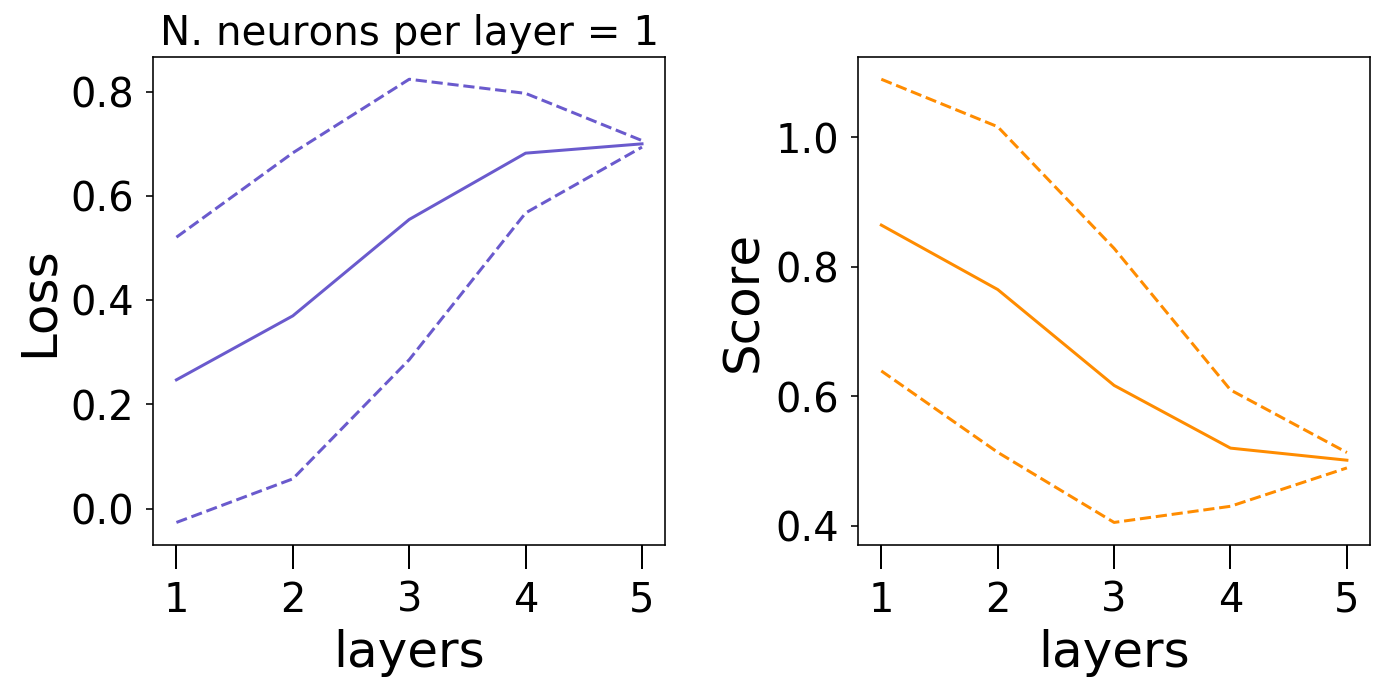

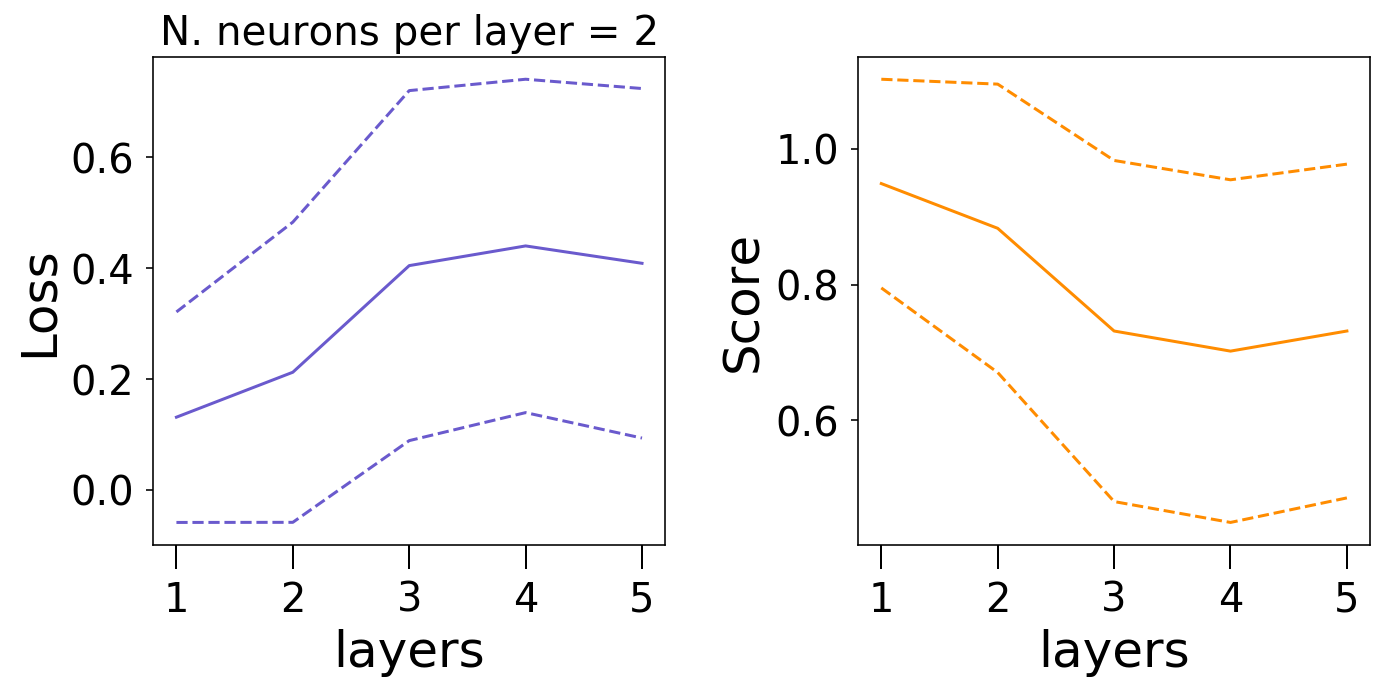

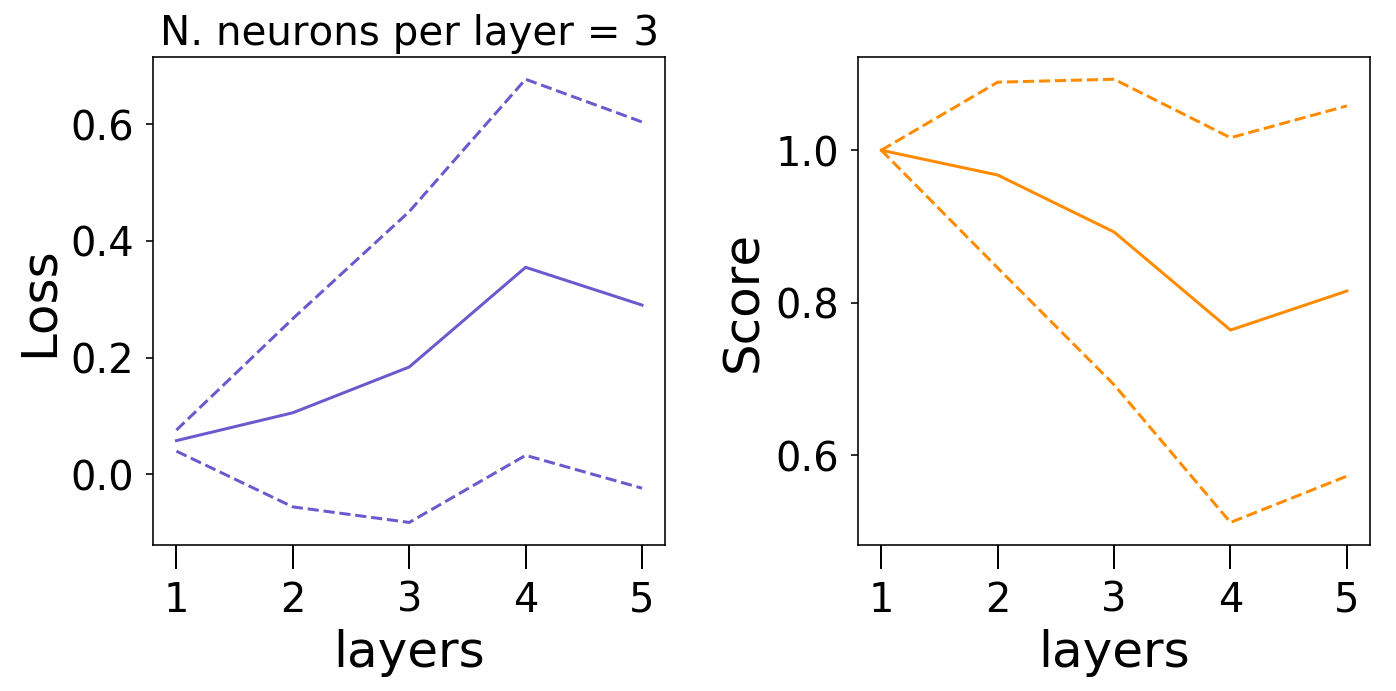

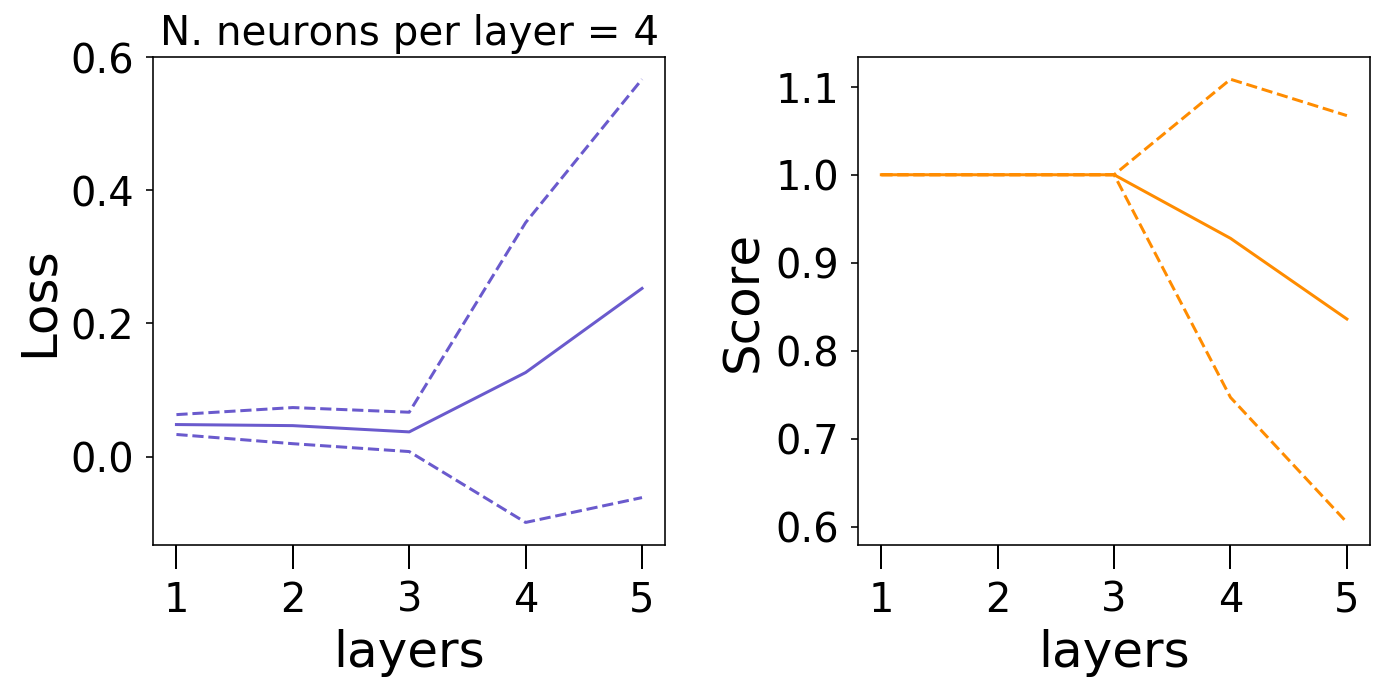

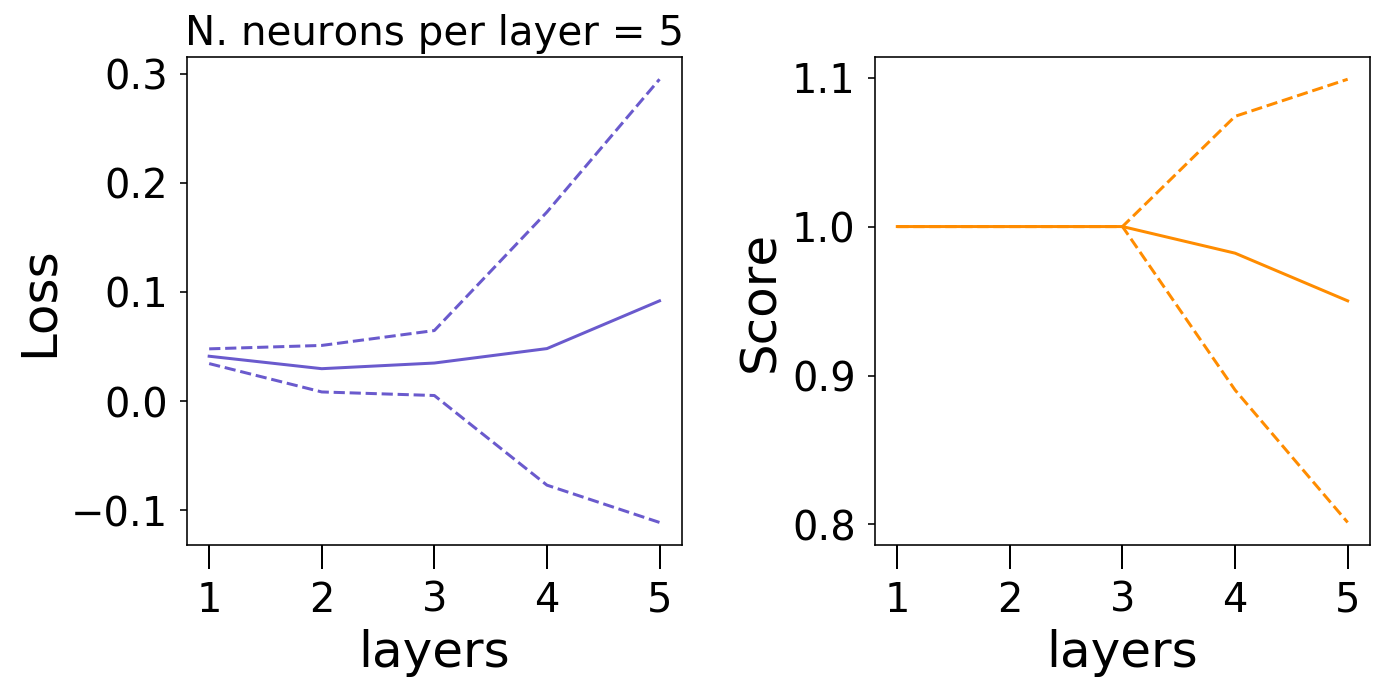

In [117]:
# The code is really slow so I decided to take only 5 neurons or 4 layers maximum.

neurons_range = range(1,6)
layers_range = range(1,5)
n_runs = 30

for n_neurons in neurons_range:
    print("n_neurons", n_neurons)
    fig, ax = plt.subplots(1,2, figsize=(10,5))
    avg_loss_n_neurons = []
    std_loss_n_neurons = []
    avg_score_test_n_neurons = []
    std_score_test_n_neurons = []
    for n_layers in layers_range:
        losses = []
        scores_test = []
        for j in range(n_runs):
            mlpc.set_params(hidden_layer_sizes=(n_neurons,)*n_layers, random_state = None)
            mlpc.fit(X_train_polyft,y_train)
            losses.append(mlpc.loss_)
            scores_test.append(mlpc.score(X_test_polyft,y_test))
        avg_loss_n_neurons.append(np.mean(losses))
        std_loss_n_neurons.append(np.std(losses))
        avg_score_test_n_neurons.append(np.mean(scores_test))
        std_score_test_n_neurons.append(np.std(scores_test))
    avg_loss_n_neurons = np.array(avg_loss_n_neurons)
    std_loss_n_neurons = np.array(std_loss_n_neurons)
    avg_score_test_n_neurons = np.array(avg_score_test_n_neurons)
    std_score_test_n_neurons = np.array(std_score_test_n_neurons)
    #
    ax[0].plot(layers_range, avg_loss_n_neurons, color='slateblue')
    ax[0].plot(layers_range, avg_loss_n_neurons - std_loss_n_neurons, layers_range, avg_loss_n_neurons + std_loss_n_neurons, ls = '--', color='slateblue')
    ax[0].set_title("N. neurons per layer = {0}".format(n_neurons))
    ax[0].set_xlabel("layers")
    ax[0].set_ylabel("Loss")
    ax[0].set_xticks(layers_range)
    #
    ax[1].plot(layers_range, avg_score_test_n_neurons, color='darkorange')
    ax[1].plot(layers_range, avg_score_test_n_neurons - std_score_test_n_neurons, layers_range, avg_score_test_n_neurons + std_score_test_n_neurons, ls = '--', color='darkorange')
    ax[1].set_xlabel("layers")
    ax[1].set_ylabel("Score")
    ax[1].set_xticks(layers_range)
    plt.tight_layout()

As we can see from the pictures, the score improve wrt to the case where no polynomial features are used, as expected, since the combination of $x_{1}^{2}$ and $x_{2}^{2}$ give exactly the feature that separate points (a circle of a given radius).

What is unexpected is that increasing the number of layers do increase the loss function, instead of decreasing it. Moreover, the score decreases as the number of layers increases since the model it may somehow overfit the training data.

### About the activation function

Playing with the interactive visualization above, we can qualitativaly see that the tahn as activation function allows to draw regions that separate points that are smoother, where the sharp vertices disappear and edges are no longer straight lines. It seems also that 4 neurons and 1 layers are enough to reproduce the separation between red and blue points.

n_neurons 1
n_neurons 2
n_neurons 3
n_neurons 4
n_neurons 5


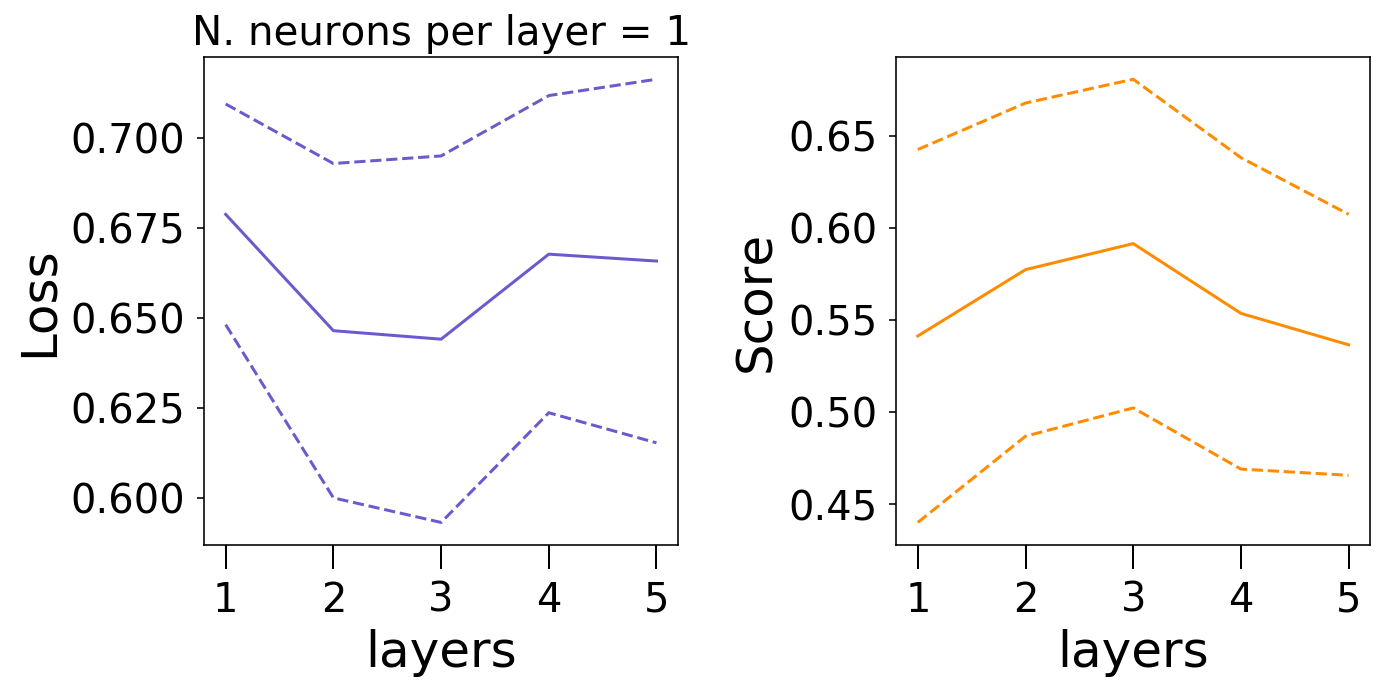

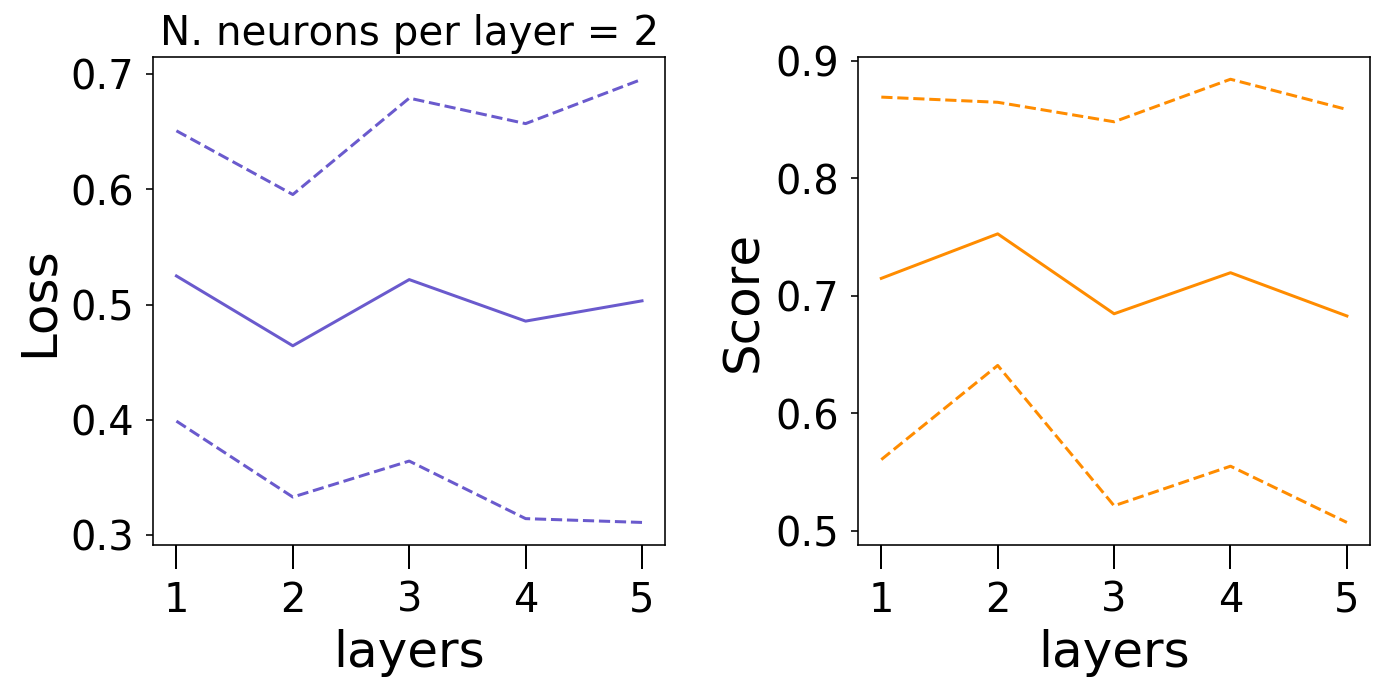

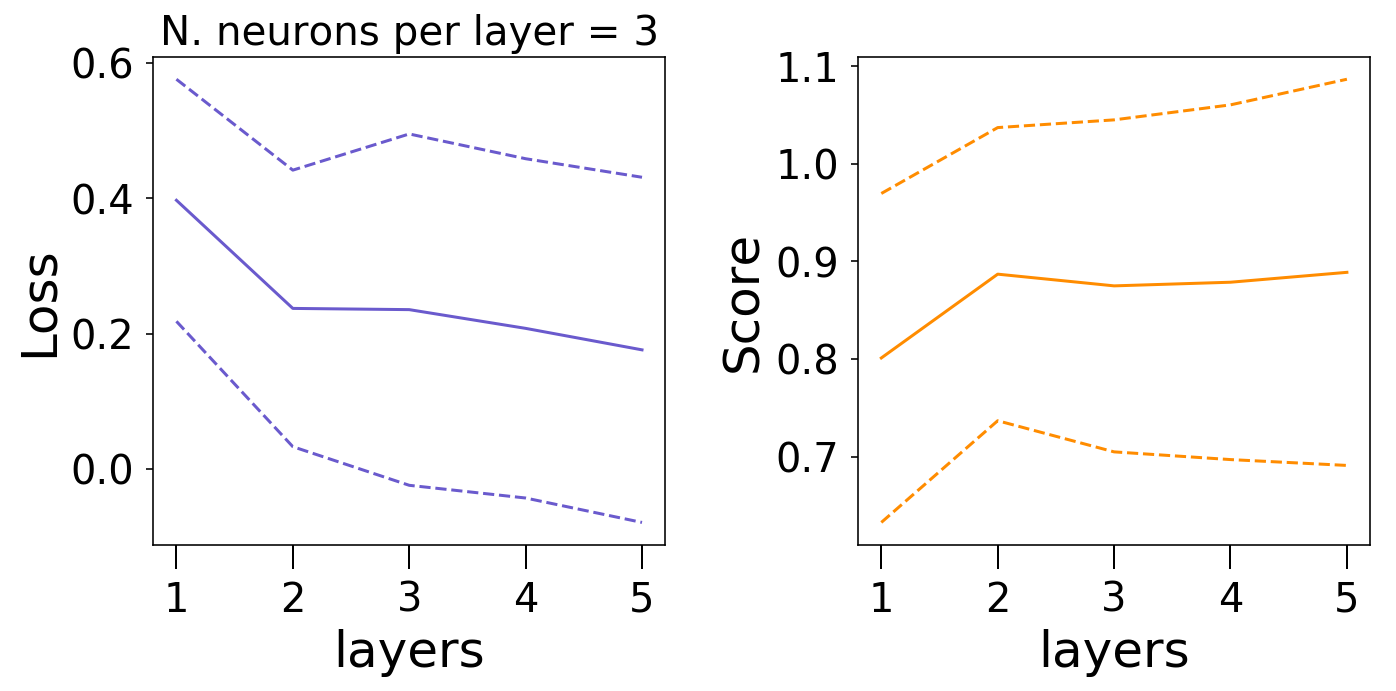

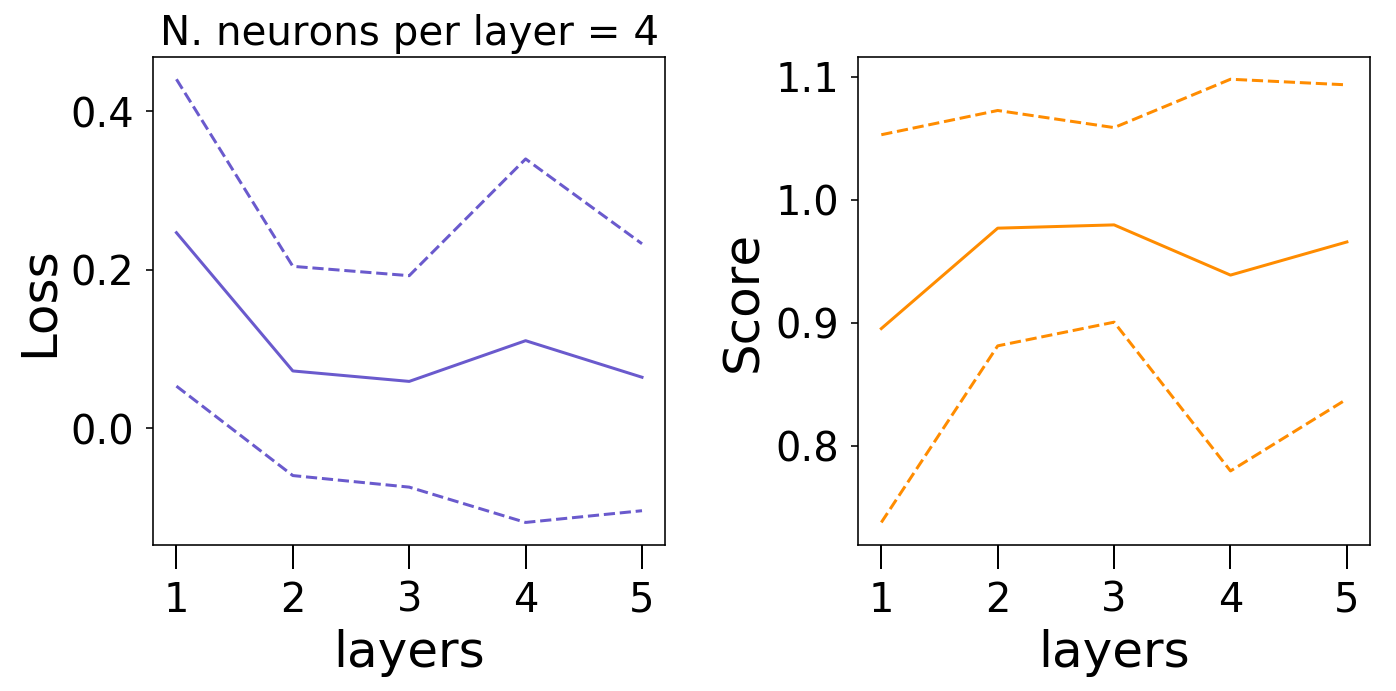

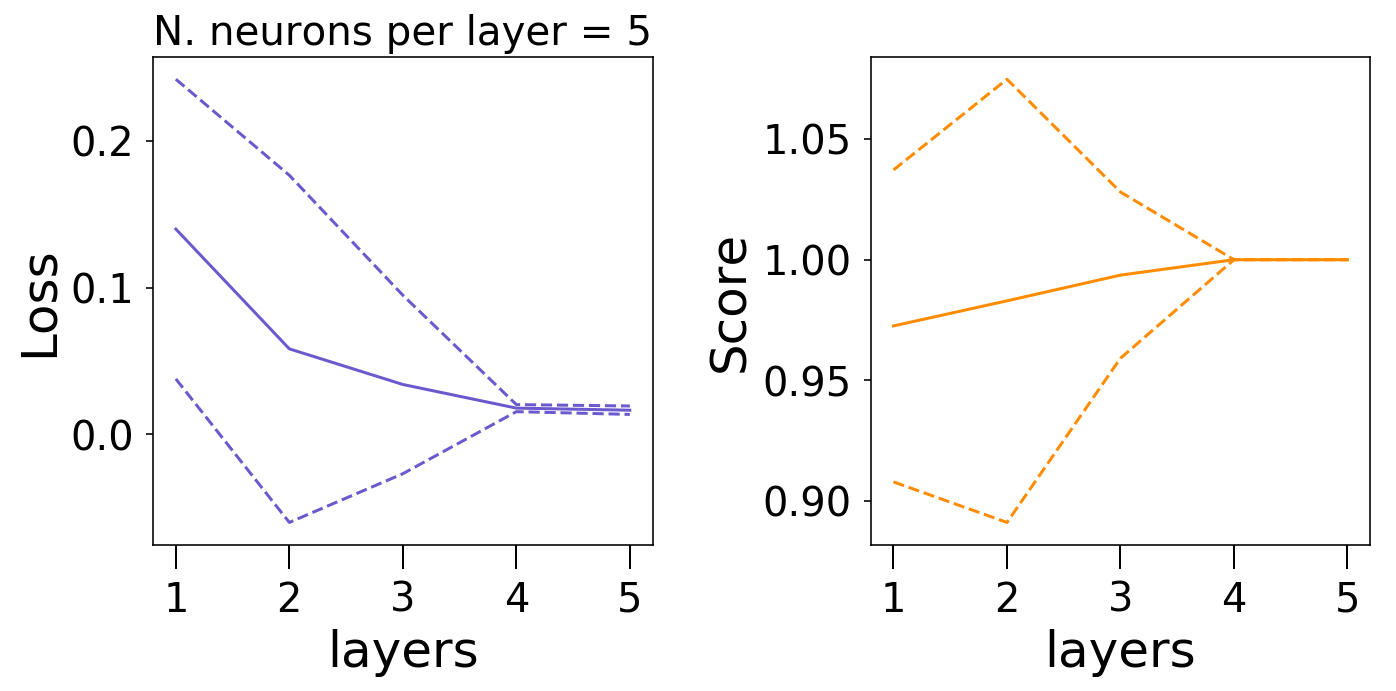

In [120]:
neurons_range = range(1,3)
layers_range = range(1,4)

# It takes 5 minutes to run with n_runs = 30

n_runs = 30

for n_neurons in neurons_range:
    print("n_neurons", n_neurons)
    fig, ax = plt.subplots(1,2, figsize=(10,5))
    avg_loss_n_neurons = []
    std_loss_n_neurons = []
    avg_score_test_n_neurons = []
    std_score_test_n_neurons = []
    for n_layers in layers_range:
        losses = []
        scores_test = []
        for j in range(n_runs):
            mlpc.set_params(hidden_layer_sizes=(n_neurons,)*n_layers, random_state = None, activation='tanh')
            mlpc.fit(X_train,y_train)
            losses.append(mlpc.loss_)
            scores_test.append(mlpc.score(X_test,y_test))
        avg_loss_n_neurons.append(np.mean(losses))
        std_loss_n_neurons.append(np.std(losses))
        avg_score_test_n_neurons.append(np.mean(scores_test))
        std_score_test_n_neurons.append(np.std(scores_test))
    avg_loss_n_neurons = np.array(avg_loss_n_neurons)
    std_loss_n_neurons = np.array(std_loss_n_neurons)
    avg_score_test_n_neurons = np.array(avg_score_test_n_neurons)
    std_score_test_n_neurons = np.array(std_score_test_n_neurons)
    #
    ax[0].plot(layers_range, avg_loss_n_neurons, color='slateblue')
    ax[0].plot(layers_range, avg_loss_n_neurons - std_loss_n_neurons, layers_range, avg_loss_n_neurons + std_loss_n_neurons, ls = '--', color='slateblue')
    ax[0].set_title("N. neurons per layer = {0}".format(n_neurons))
    ax[0].set_xlabel("layers")
    ax[0].set_ylabel("Loss")
    ax[0].set_xticks(layers_range)
    #
    ax[1].plot(layers_range, avg_score_test_n_neurons, color='darkorange')
    ax[1].plot(layers_range, avg_score_test_n_neurons - std_score_test_n_neurons, layers_range, avg_score_test_n_neurons + std_score_test_n_neurons, ls = '--', color='darkorange')
    ax[1].set_xlabel("layers")
    ax[1].set_ylabel("Score")
    ax[1].set_xticks(layers_range)
    #
    plt.tight_layout()

Since the 'tanh' activation function it smoother, it is then more suited to reproduce the borders that separate points, as can be seen from the loss function and the score above. In general, comparing to the first plots we can somehow say that 'tanh' performs better.

Interestingly, in this case the behavior of the loss function is more similar to what expected in principle.

---

## Question 2.5

Use the spiral data set build a neural network classifier that can solve the problem (scikit-learn provides a MLPClassifier classifier that implements a neural network). Comment on:
* what is the minimum number of layers
* what is the minimum width of each layer
* is there a difference between using the tanh and ReLU activation functions?
* (bonus) build the same neural network using `keras` instead.
* (bonus) can you create a visualisation to show how the network transforms the problem? (Tim isn't sure this can be done, so don't spend forever on this.)

In [3]:
def make_spiral():
    N = 100 # number of points per class
    K = 3 # number of classes
    X = np.zeros((N*K, 2)) # data matrix (each row = single example)
    y = np.zeros(N*K, dtype='uint8') # class labels
    for j in range(K):
        ix = range(N*j, N*(j+1))
        r = np.linspace(0.0, 1, N) # radius
        t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2 # theta
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j

    return X, y

X,y = make_spiral()

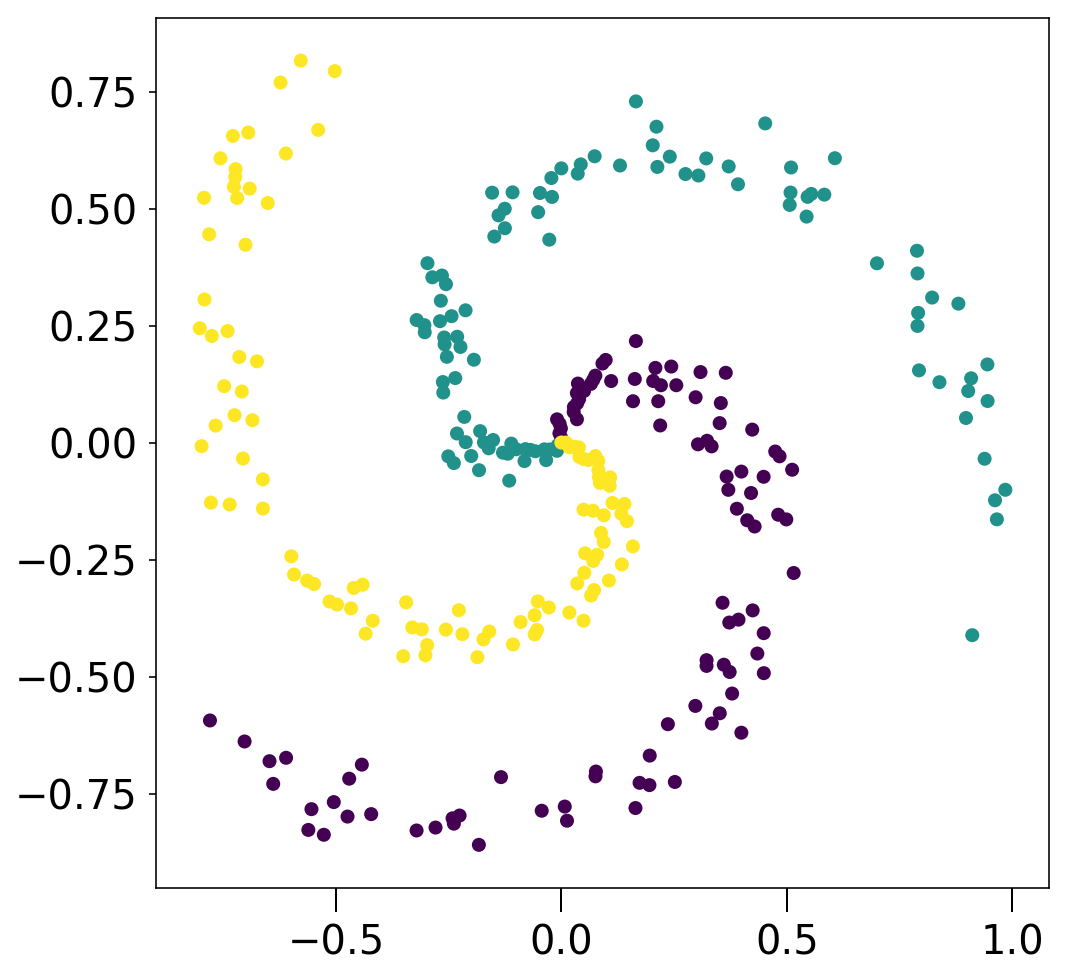

In [4]:
plt.scatter(X[:,0], X[:,1], c=y)

In [7]:
mlpc = MLPClassifier(hidden_layer_sizes=(1,), 
                    max_iter=3000,
                    verbose=0,
                    activation='relu')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=66)

n_neurons 1
n_neurons 2
n_neurons 3
n_neurons 4


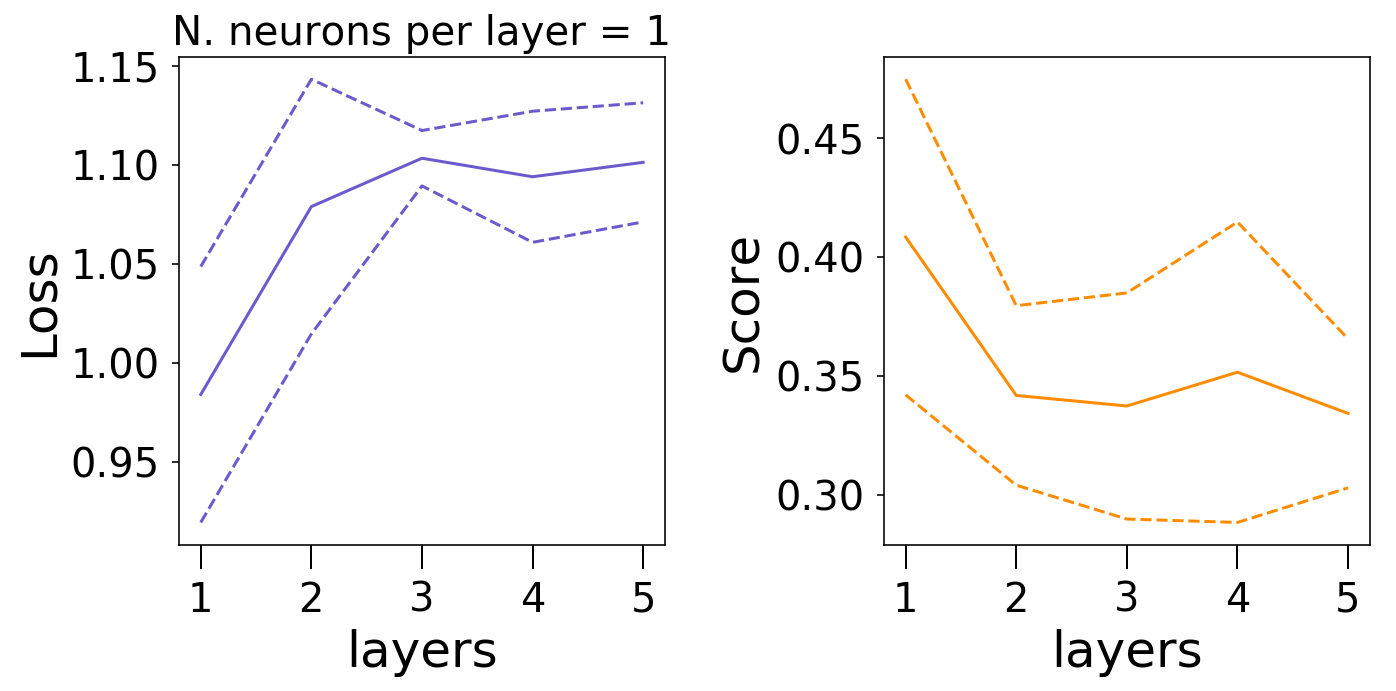

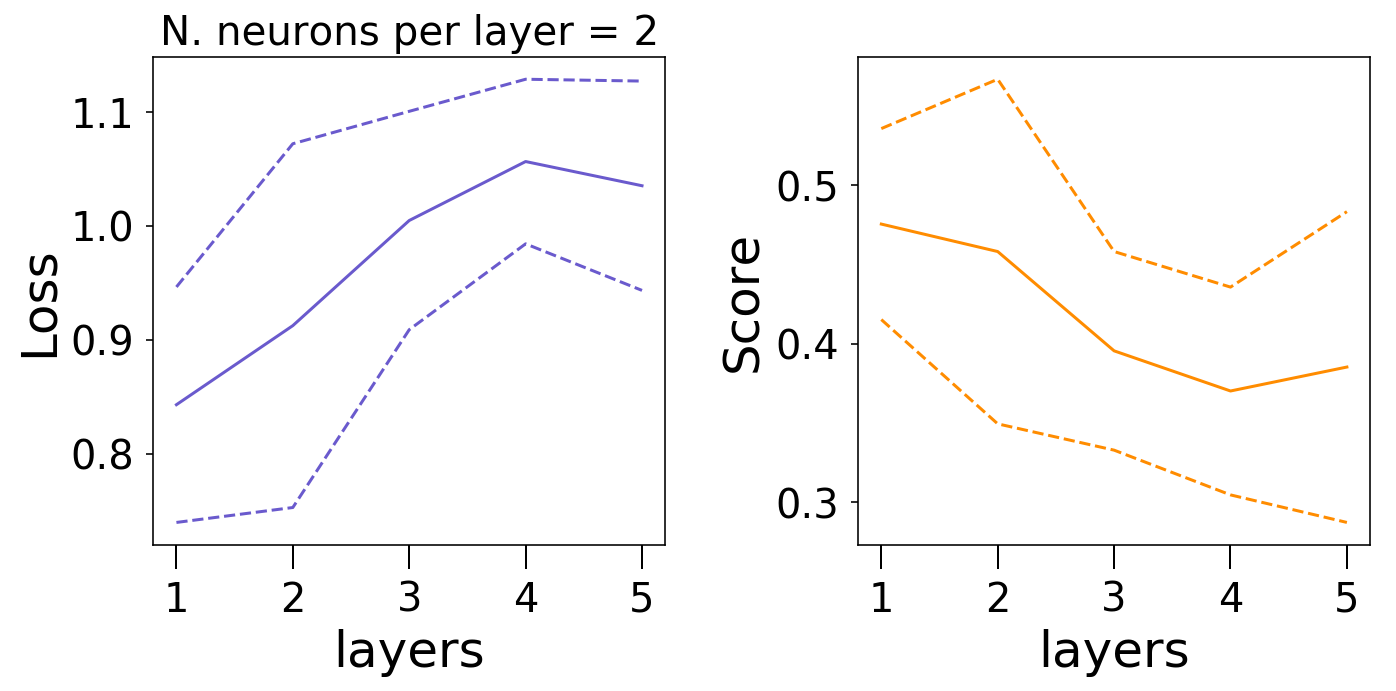

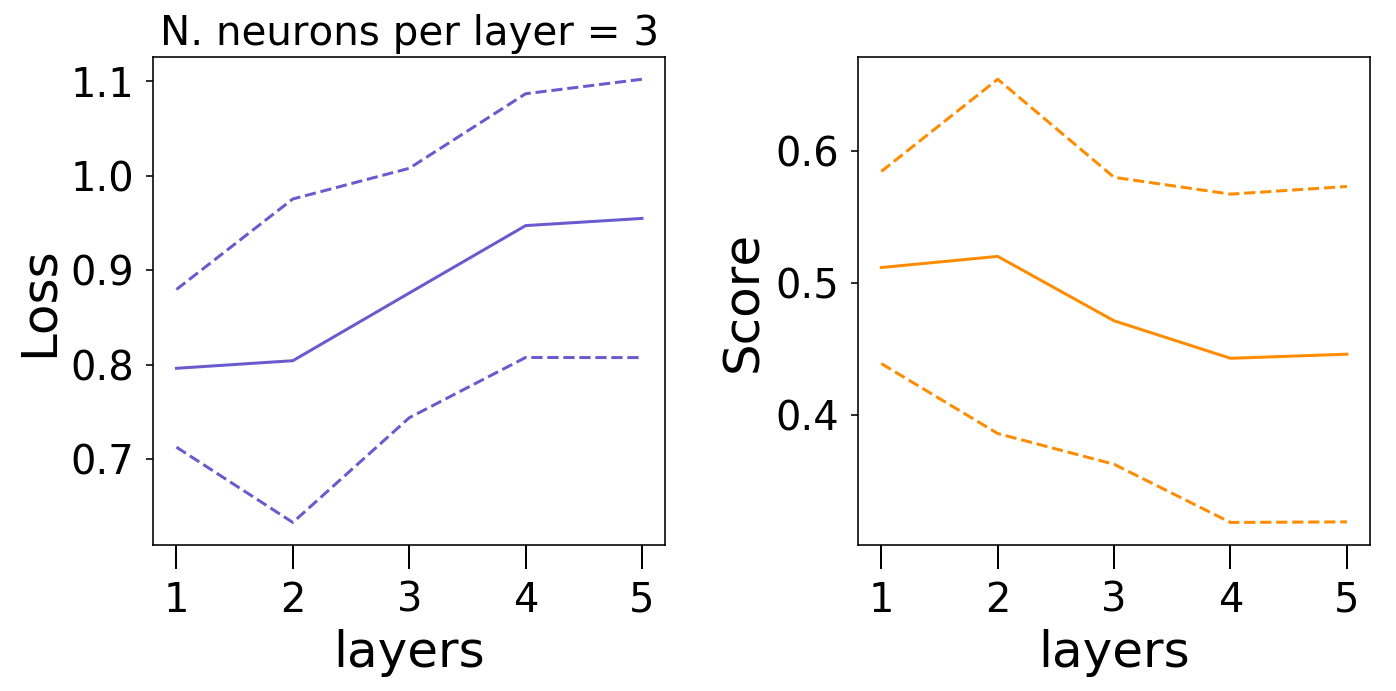

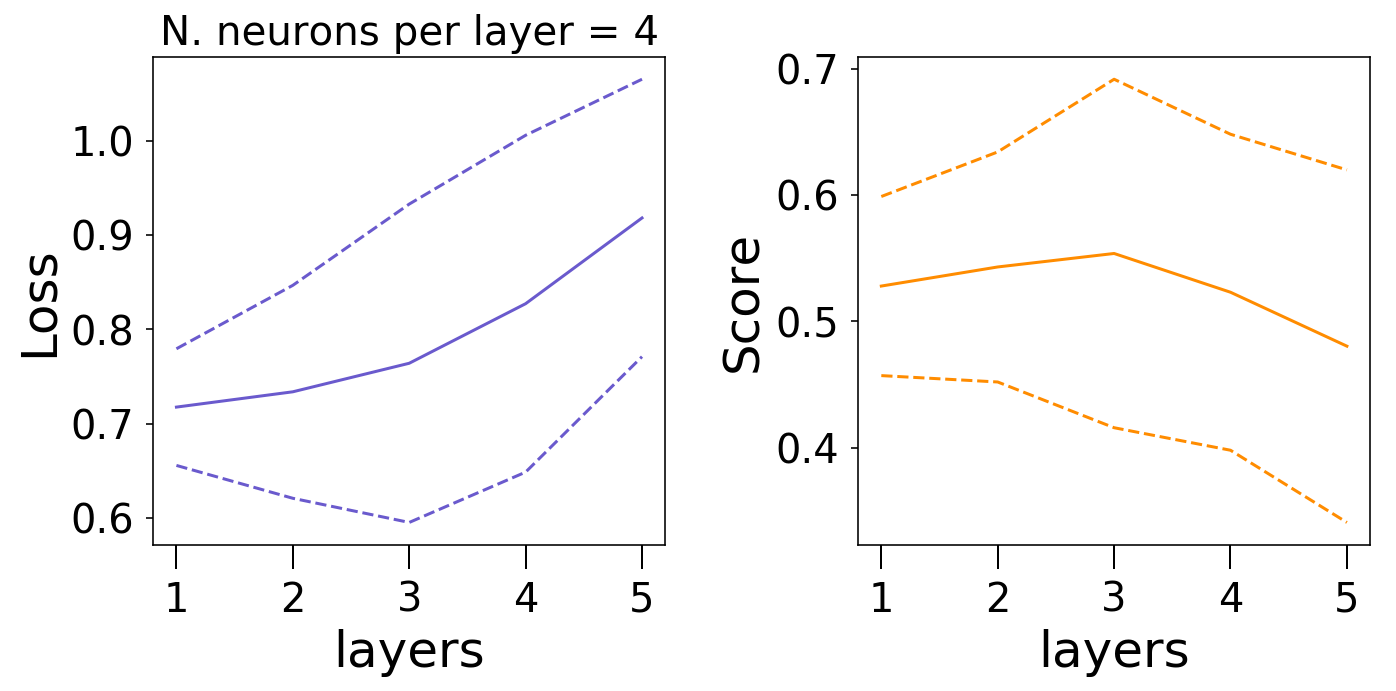

In [128]:
neurons_range = range(1,5)
layers_range = range(1,6)

# It takes 5 minutes to run with n_runs = 30

n_runs = 30

for n_neurons in neurons_range:
    print("n_neurons", n_neurons)
    fig, ax = plt.subplots(1,2, figsize=(10,5))
    avg_loss_n_neurons = []
    std_loss_n_neurons = []
    avg_score_test_n_neurons = []
    std_score_test_n_neurons = []
    for n_layers in layers_range:
        losses = []
        scores_test = []
        for j in range(n_runs):
            mlpc.set_params(hidden_layer_sizes=(n_neurons,)*n_layers, random_state = None)
            mlpc.fit(X_train,y_train)
            losses.append(mlpc.loss_)
            scores_test.append(mlpc.score(X_test,y_test))
        avg_loss_n_neurons.append(np.mean(losses))
        std_loss_n_neurons.append(np.std(losses))
        avg_score_test_n_neurons.append(np.mean(scores_test))
        std_score_test_n_neurons.append(np.std(scores_test))
    avg_loss_n_neurons = np.array(avg_loss_n_neurons)
    std_loss_n_neurons = np.array(std_loss_n_neurons)
    avg_score_test_n_neurons = np.array(avg_score_test_n_neurons)
    std_score_test_n_neurons = np.array(std_score_test_n_neurons)
    #
    ax[0].plot(layers_range, avg_loss_n_neurons, color='slateblue')
    ax[0].plot(layers_range, avg_loss_n_neurons - std_loss_n_neurons, layers_range, avg_loss_n_neurons + std_loss_n_neurons, ls = '--', color='slateblue')
    ax[0].set_title("N. neurons per layer = {0}".format(n_neurons))
    ax[0].set_xlabel("layers")
    ax[0].set_ylabel("Loss")
    ax[0].set_xticks(layers_range)
    #
    ax[1].plot(layers_range, avg_score_test_n_neurons, color='darkorange')
    ax[1].plot(layers_range, avg_score_test_n_neurons - std_score_test_n_neurons, layers_range, avg_score_test_n_neurons + std_score_test_n_neurons, ls = '--', color='darkorange')
    ax[1].set_xlabel("layers")
    ax[1].set_ylabel("Score")
    ax[1].set_xticks(layers_range)
    #
    plt.tight_layout()

### Minimum number of layers

Clearly, the problem is more diffucult to solve in the case of the spiral dataset. In this case, is difficult to argue the mimum number of layers needed, since we cannot figure out how the NN can lineary separate the different classes in this space. Indeed, if before the NN could have solve the problem by drawing linear bounds on $x_{1}$ and $x_{2}$ perpendicular to each other that include the blue points and exclude the red ones, i.e. using a square, now the NN can achieve the same by "drawing" square around different regions of each branch of the spiral.

Since the problem involves more complicated combination of the coordinates, we expect that using few layer we are not able to recover a good classification, as outlined by the scores in the plots above. Indeed, the values of the scores are much smaller than the ones of the circle example.

### Minimum number of neurons/units

We may argue that we need at least 3 neurons (with more than one layer), each one taking care of trying to separating one branch of the spiral from the others. Still, this conservative estimate won't be satisfactory since the score is really poor. More likely, we need to go much beyond 5 neurons per layer or 5 inner layers with more than 1 neuron each to improve the classification and arrive at a satisfactory point.

In [138]:
n_neurons = 50
n_layers = 1

losses = []
scores_test = []
for j in range(n_runs):
    mlpc.set_params(hidden_layer_sizes=(n_neurons,)*n_layers, random_state = None)
    mlpc.fit(X_train,y_train)
    losses.append(mlpc.loss_)
    scores_test.append(mlpc.score(X_test,y_test))
avg_loss_n_neurons = np.mean(losses)
std_loss_n_neurons = np.std(losses)
avg_score_test_n_neurons = np.mean(scores_test)
std_score_test_n_neurons = np.std(scores_test)
avg_loss_n_neurons = np.array(avg_loss_n_neurons)
std_loss_n_neurons = np.array(std_loss_n_neurons)
avg_score_test_n_neurons = np.array(avg_score_test_n_neurons)
std_score_test_n_neurons = np.array(std_score_test_n_neurons)

print("Loss")
print(avg_loss_n_neurons - std_loss_n_neurons)
print(avg_loss_n_neurons)
print(avg_loss_n_neurons + std_loss_n_neurons)
print("\nScore")
print(avg_score_test_n_neurons - std_score_test_n_neurons)
print(avg_score_test_n_neurons)
print(avg_score_test_n_neurons + std_score_test_n_neurons)


##################

n_neurons = 25
n_layers = 2

losses = []
scores_test = []
for j in range(n_runs):
    mlpc.set_params(hidden_layer_sizes=(n_neurons,)*n_layers, random_state = None)
    mlpc.fit(X_train,y_train)
    losses.append(mlpc.loss_)
    scores_test.append(mlpc.score(X_test,y_test))
avg_loss_n_neurons = np.mean(losses)
std_loss_n_neurons = np.std(losses)
avg_score_test_n_neurons = np.mean(scores_test)
std_score_test_n_neurons = np.std(scores_test)
avg_loss_n_neurons = np.array(avg_loss_n_neurons)
std_loss_n_neurons = np.array(std_loss_n_neurons)
avg_score_test_n_neurons = np.array(avg_score_test_n_neurons)
std_score_test_n_neurons = np.array(std_score_test_n_neurons)

print('\n', "="*30, "\n")

print("Loss")
print(avg_loss_n_neurons - std_loss_n_neurons)
print(avg_loss_n_neurons)
print(avg_loss_n_neurons + std_loss_n_neurons)
print("\nScore")
print(avg_score_test_n_neurons - std_score_test_n_neurons)
print(avg_score_test_n_neurons)
print(avg_score_test_n_neurons + std_score_test_n_neurons)

Loss
0.172391308348
0.28686125417533
0.401331200003

Score
0.783142168737
0.884888888888889
0.986635609041


Loss
0.114273340762
0.24500831522784067
0.375743289693

Score
0.820253566406
0.9155555555555558
1.0108575447


### Difference between activation functions

n_neurons 1
n_neurons 2
n_neurons 3
n_neurons 4


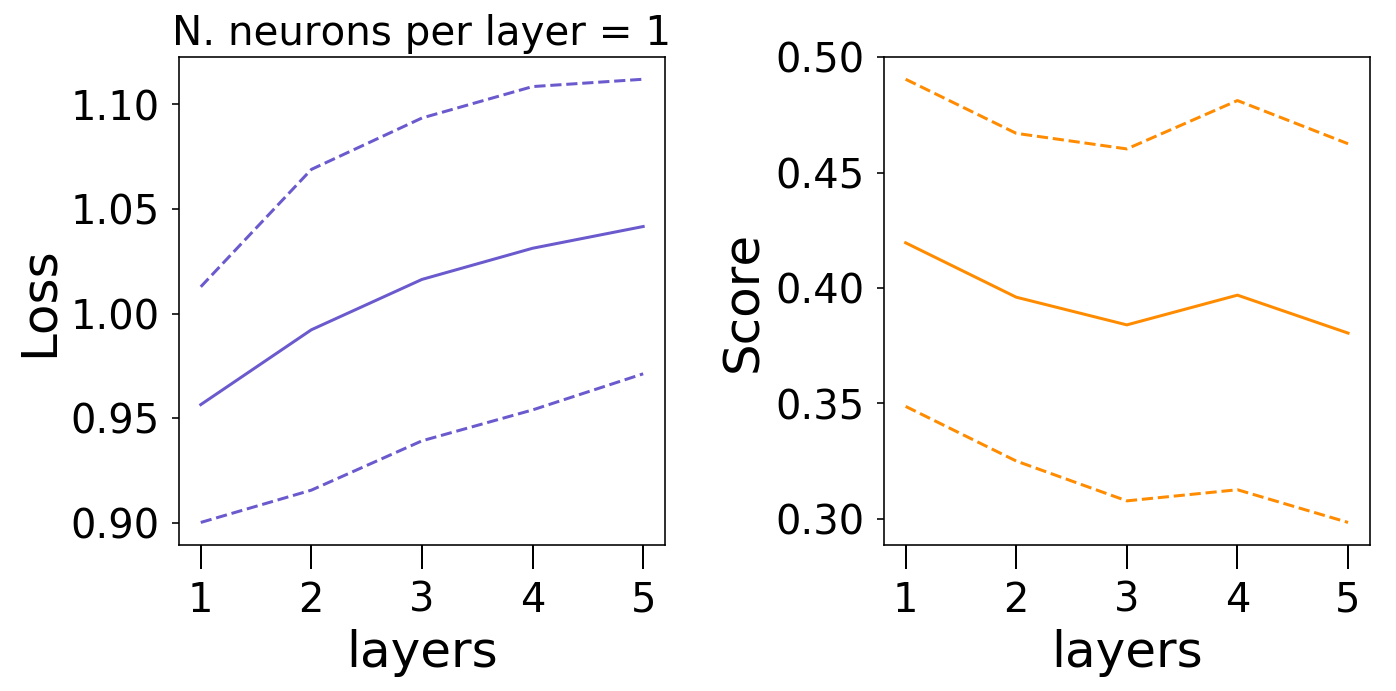

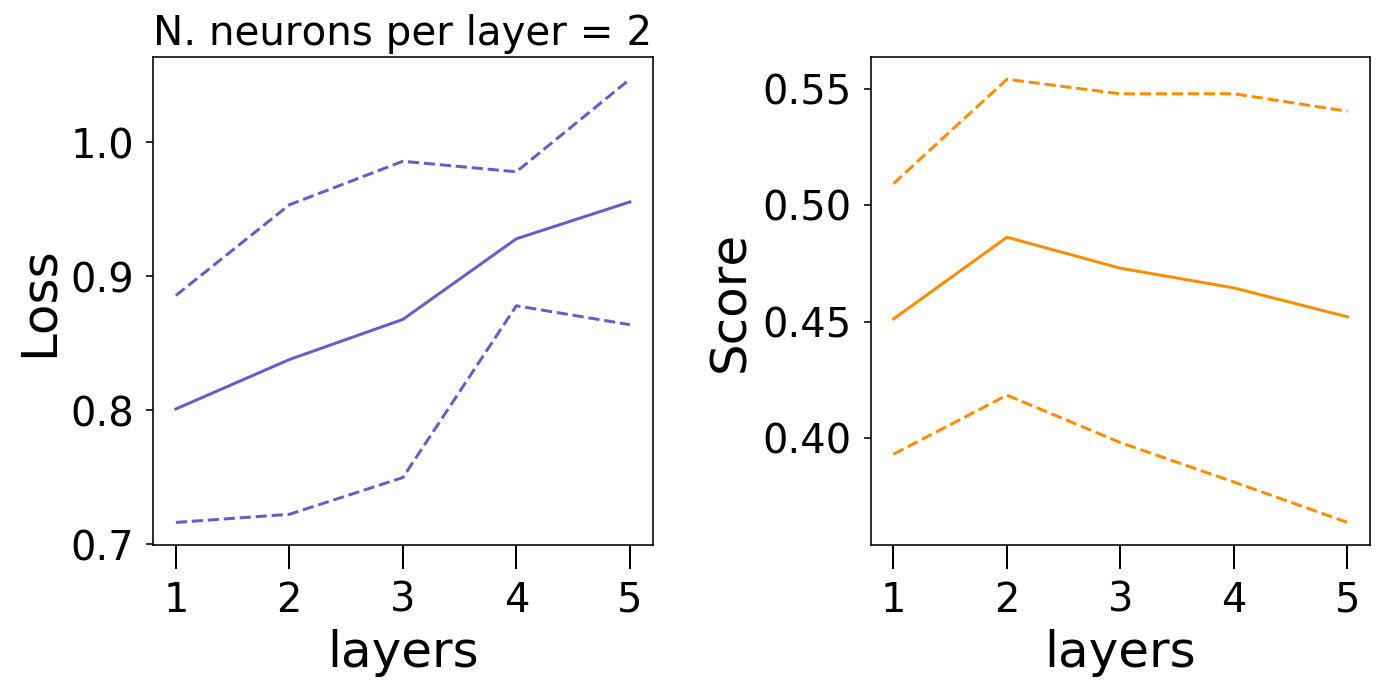

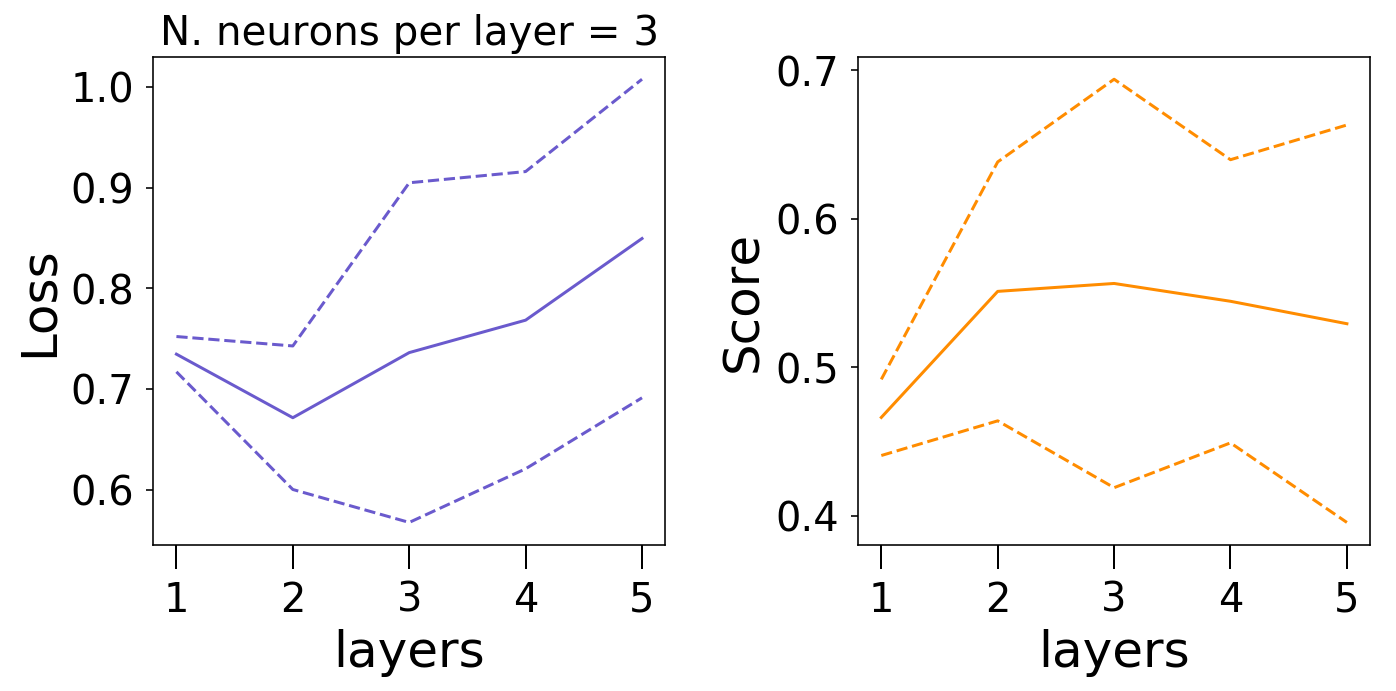

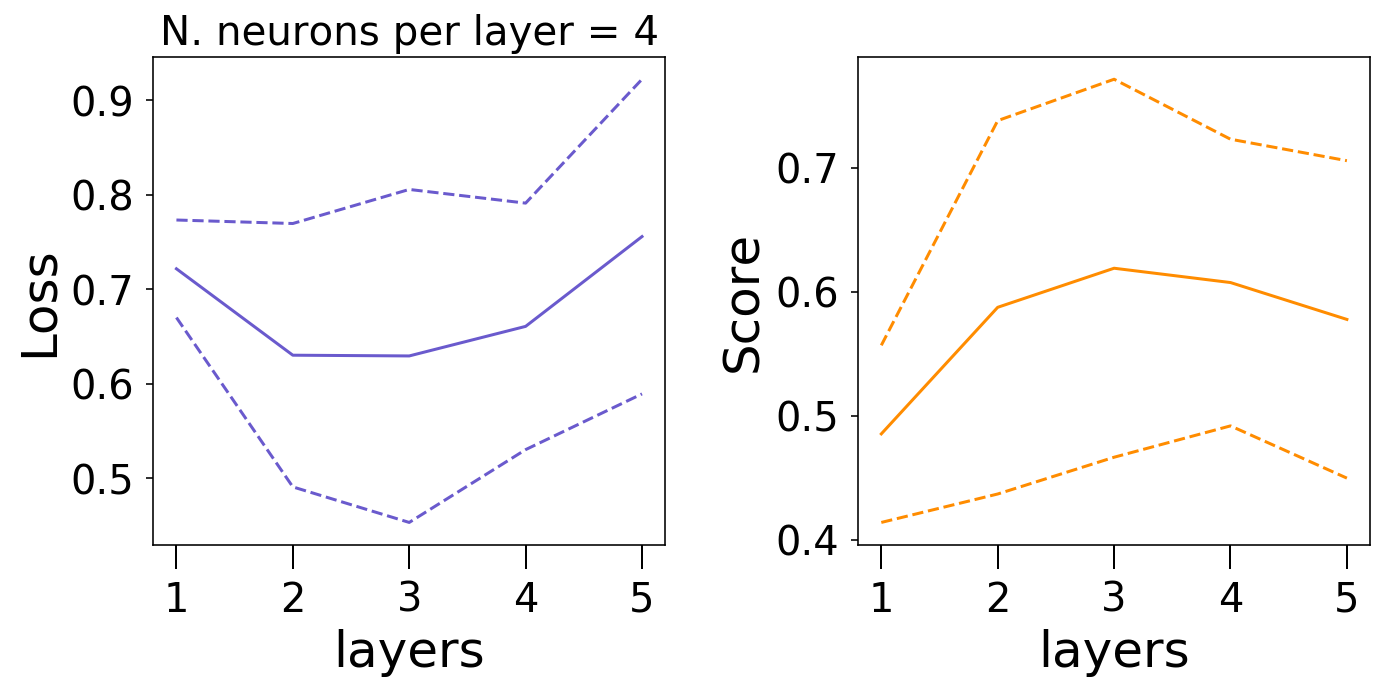

In [8]:
neurons_range = range(1,5)
layers_range = range(1,6)

# It takes 5 minutes to run with n_runs = 30

n_runs = 30

for n_neurons in neurons_range:
    print("n_neurons", n_neurons)
    fig, ax = plt.subplots(1,2, figsize=(10,5))
    avg_loss_n_neurons = []
    std_loss_n_neurons = []
    avg_score_test_n_neurons = []
    std_score_test_n_neurons = []
    for n_layers in layers_range:
        losses = []
        scores_test = []
        for j in range(n_runs):
            mlpc.set_params(hidden_layer_sizes=(n_neurons,)*n_layers, random_state = None, activation='tanh')
            mlpc.fit(X_train,y_train)
            losses.append(mlpc.loss_)
            scores_test.append(mlpc.score(X_test,y_test))
        avg_loss_n_neurons.append(np.mean(losses))
        std_loss_n_neurons.append(np.std(losses))
        avg_score_test_n_neurons.append(np.mean(scores_test))
        std_score_test_n_neurons.append(np.std(scores_test))
    avg_loss_n_neurons = np.array(avg_loss_n_neurons)
    std_loss_n_neurons = np.array(std_loss_n_neurons)
    avg_score_test_n_neurons = np.array(avg_score_test_n_neurons)
    std_score_test_n_neurons = np.array(std_score_test_n_neurons)
    #
    ax[0].plot(layers_range, avg_loss_n_neurons, color='slateblue')
    ax[0].plot(layers_range, avg_loss_n_neurons - std_loss_n_neurons, layers_range, avg_loss_n_neurons + std_loss_n_neurons, ls = '--', color='slateblue')
    ax[0].set_title("N. neurons per layer = {0}".format(n_neurons))
    ax[0].set_xlabel("layers")
    ax[0].set_ylabel("Loss")
    ax[0].set_xticks(layers_range)
    #
    ax[1].plot(layers_range, avg_score_test_n_neurons, color='darkorange')
    ax[1].plot(layers_range, avg_score_test_n_neurons - std_score_test_n_neurons, layers_range, avg_score_test_n_neurons + std_score_test_n_neurons, ls = '--', color='darkorange')
    ax[1].set_xlabel("layers")
    ax[1].set_ylabel("Score")
    ax[1].set_xticks(layers_range)
    #
    plt.tight_layout()

---

## Question 3

Build a fully connected neural network and a ConvNet to classify hand written digits.

scikit-learn's NN implementation does not support convolutional layers so it is probably
best to implement both using `keras`.

Experiment with different network architectures, different optimisers and such.

You should be able to achieve accuracies > 95% pretty quickly. With a bit of experimenting
you can probably reach 98% or 99%.

This question is about getting you comfortable using `keras` and constructing networks
from basic building blocks. Feel free to experiment, brnach out and try different things.

Note: this might take a while to train, unfortunately.

In [ ]:
# loading the MNIST (or digits) dataset in keras
from keras.datasets import mnist

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# the first time you run this you need to have internet so it can download the data

In [ ]:
# some of the layers we discussed in class, checkout the documentation if you need more
# or want to experiment
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

# your solution